# Project 01 Sample 01

### My Notes

During my recent exploration of the dataset, I took the opportunity to delve into the available data and gain insights ahead of our project. It's important to note that this dataset is a sample, utilized primarily for testing and exploration purposes.

Here are some key points I discovered:

- Data merging or joining is on the horizon, but it's crucial to note that each dataset contains varying numbers of entries.
- I'm still deliberating on the effectiveness of time series analysis and the viability of age-related data for our project.
- When converting each column's data, I experimented with two methods. One method was slower but offered customization options (e.g., assigning "yes" as 1 and "no" as 0). However, this approach encountered issues in specific columns, such as age and smoking, where the data were not in sequential order. For instance, the age bar chart exhibited an odd pattern due to the non-sequential arrangement of ages (e.g., age 80 situated in the middle of the dataset). I'm manually working on an alternative file to investigate this further, considering its significance, especially for Jeffery.
- Discovering correlations presented a challenge. I employed two distinct methods, each resulting in different outcomes due to varying calculation approaches.
- Interestingly, our initial two questions appear quite similar, prompting swift initial responses from my end.
- As a recommendation, I suggest focusing efforts on the 'CDC - heart_2022_no_nans.csv' file. It requires some refinement, but the effort invested promises worthwhile outcomes.


# Importing Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df= pd.read_csv("project_1 data/heart_2020_cleaned.csv")
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [2]:
df['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

# Exploring Data

In [3]:
display(df.shape)
display(df.info())
display(df.describe())
display(df.columns)

(319795, 18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

None

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

# Quick Test

In [4]:
# Convert 'Race' column to categorical type
df['Race'] = df['Race'].astype('category')

In [5]:
#reframing the data for mapping
age_map = {
    '18-24': 1,
    '25-29': 2,
    '30-34': 3,
    '35-39': 4,
    '40-44': 5,
    '45-49': 6,
    '50-54': 7,
    '55-59': 8,
    '60-64': 9,
    '65-69': 10,
    '70-74': 11,
    '75-79': 12,
    '80 or older': 13
}
df['AgeCategory'] = df['AgeCategory'].map(age_map)




health_map = {
    'Very good': 3,   
    'Good': 2,  
    'Excellent': 4,    
    'Fair': 1,       
    'Poor': 0   
}

df['GenHealth'] = df['GenHealth'].map(health_map)



race_map = {
    'White': 1,                          
    'Hispanic': 3,                        
    'Black': 2,                                                          
    'Asian': 4,                             
    'American Indian/Alaskan Native': 5,
    'Other': 6
}

df['Race'] = df['Race'].map(race_map)




sex_map = {
    'Male': 1,                          
    'Female': 2,                        
    
}

df['Sex'] = df['Sex'].map(sex_map)




diabetes_map = {
    'Yes': 3,
    'Yes (during pregnancy)': 2,
    'No, borderline diabetes': 1,
    'No': 0
}

df['Diabetic'] = df['Diabetic'].map(diabetes_map)


Category 1: BMI <= 18.5
Category 2: 18.5 < BMI <= 24.9
Category 3: 24.9 < BMI <= 29.9
Category 4: 29.9 < BMI <= 34.9
Category 5: BMI > 34.9

In [6]:

# Changing the BMI to 1-5 catogories in new colums
bins = [0, 18.5, 24.9, 29.9, 34.9, float('inf')]  # Define bins based on BMI categories
labels = [1, 2, 3, 4, 5]  # Corresponding labels for each category

# Categorizing BMI values into 5 categories
df['BMI_category'] = pd.cut(df['BMI'], bins=bins, labels=labels)

# Convert the new column to integer type
df['BMI_category'] = df['BMI_category'].astype(int)


In [7]:
df['Race'].unique()

[1, 2, 4, 5, 6, 3]
Categories (6, int64): [5, 4, 2, 3, 6, 1]

In [8]:
#redefine all yes and no variables to assign a 1 to yes and 0 to no

categorical_cols_1 = ['Asthma','KidneyDisease', 'SkinCancer', 'HeartDisease',"Smoking",
                    "AlcoholDrinking", "Stroke", "DiffWalking" ,
                    ]

categorical_cols_2 = ["PhysicalActivity"]

# Define the replacement dictionary
replacement_dict_1 = {
        'Yes': 1, 
        'No': 0,
}

replacement_dict_2 = {
        'Yes': 1, 
        'No': 0,
}

# Replace values in the specified columns
df[categorical_cols_1] = df[categorical_cols_1].replace(replacement_dict_1)
df[categorical_cols_2] = df[categorical_cols_2].replace(replacement_dict_2)

In [9]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_category
0,0,16.60,1,0,0,3.0,30.0,0,2,8,1,3,1,3,5.0,1,0,1,1
1,0,20.34,0,0,1,0.0,0.0,0,2,13,1,0,1,3,7.0,0,0,0,2
2,0,26.58,1,0,0,20.0,30.0,0,1,10,1,3,1,1,8.0,1,0,0,3
3,0,24.21,0,0,0,0.0,0.0,0,2,12,1,0,0,2,6.0,0,0,1,2
4,0,23.71,0,0,0,28.0,0.0,1,2,5,1,0,1,3,8.0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,9,3,3,0,1,6.0,1,0,0,3
319791,0,29.84,1,0,0,0.0,0.0,0,1,4,3,0,1,3,5.0,1,0,0,3
319792,0,24.24,0,0,0,0.0,0.0,0,2,6,3,0,1,2,6.0,0,0,0,2
319793,0,32.81,0,0,0,0.0,0.0,0,2,2,3,0,0,2,12.0,0,0,0,4


# NEW

### Risk Factors:
- Smoking
- AlcoholDrinking
- Stroke
- BMI Category
- PhysicalHealth
- MentalHealth
- DiffWalking
- PhysicalActivity
- GenHealth
- SleepTime
- Asthma
- KidneyDisease
- SkinCancer

### Demographic Variables:
- Sex
- AgeCategory
- Race

### Health-Related:
- HeartDisease
- Diabetic

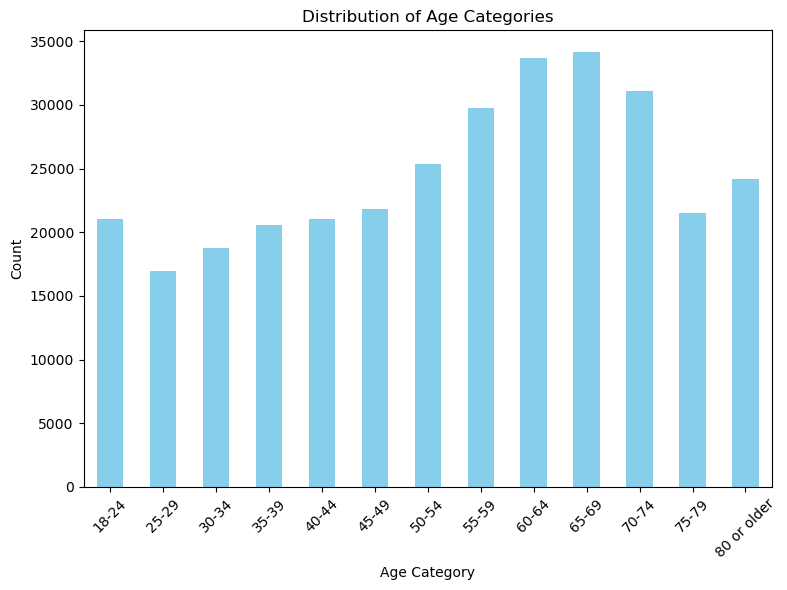

In [10]:
# Orders by Age isntead of group size.
age_counts = df['AgeCategory'].value_counts().sort_index()

# Plotting the value counts
plt.figure(figsize=(8, 6))
age_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Count')

# Create a reverse mapping from your age_map to set labels
reverse_age_map = {i: j for j, i in age_map.items()}

# Replace numeric x-axis labels with actual age ranges
plt.xticks(range(len(reverse_age_map)), [reverse_age_map[i] for i in sorted(reverse_age_map)], rotation=45)

plt.tight_layout()
plt.show()

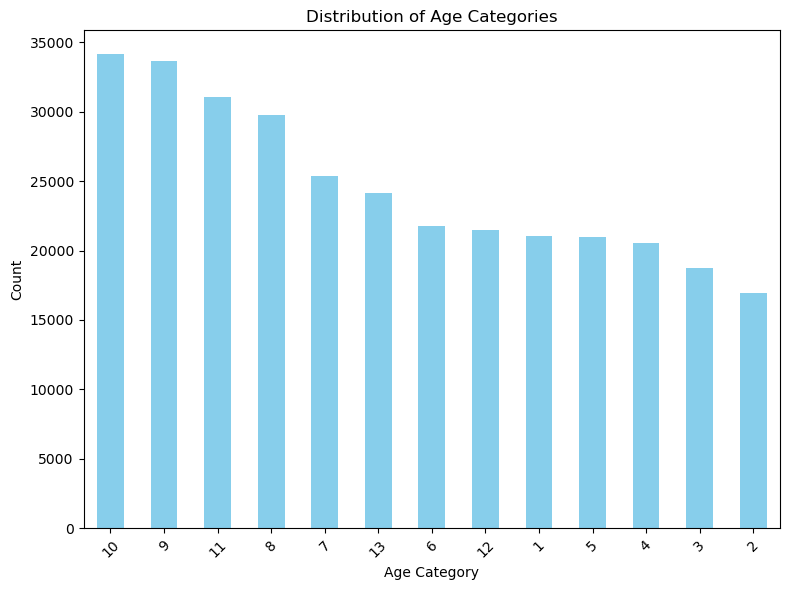

In [11]:
#sorted

age_counts = df['AgeCategory'].value_counts(ascending=False)

# Plotting the value counts
plt.figure(figsize=(8, 6))
age_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability 
plt.tight_layout()
plt.show()

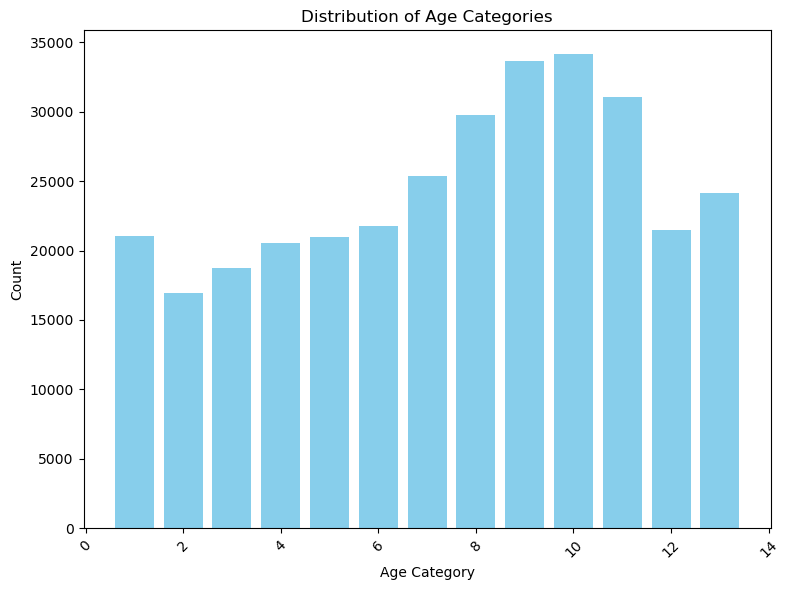

In [12]:
#no sorting


age_counts = df['AgeCategory'].value_counts()

# Resetting the index to convert the Series to a DataFrame
age_counts_df = age_counts.reset_index()
age_counts_df.columns = ['AgeCategory', 'Count']  # Rename columns for clarity

# Plotting the value counts
plt.figure(figsize=(8, 6))
plt.bar(age_counts_df['AgeCategory'], age_counts_df['Count'], color='skyblue')
plt.title('Distribution of Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability 
plt.tight_layout()
plt.show()


In [13]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'BMI_category'],
      dtype='object')

In [14]:
df_Age_category =df[['AgeCategory']]
df_Age_category.value_counts()

AgeCategory
10             34151
9              33686
11             31065
8              29757
7              25382
13             24153
6              21791
12             21482
1              21064
5              21006
4              20550
3              18753
2              16955
Name: count, dtype: int64

In [15]:
# Here I created a short list of the required columns


df_short = df[['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'PhysicalActivity', 'SleepTime']]
df_short

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,PhysicalActivity,SleepTime
0,0,16.60,1,0,0,3.0,30.0,0,2,8,1,1,5.0
1,0,20.34,0,0,1,0.0,0.0,0,2,13,1,1,7.0
2,0,26.58,1,0,0,20.0,30.0,0,1,10,1,1,8.0
3,0,24.21,0,0,0,0.0,0.0,0,2,12,1,0,6.0
4,0,23.71,0,0,0,28.0,0.0,1,2,5,1,1,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,9,3,0,6.0
319791,0,29.84,1,0,0,0.0,0.0,0,1,4,3,1,5.0
319792,0,24.24,0,0,0,0.0,0.0,0,2,6,3,1,6.0
319793,0,32.81,0,0,0,0.0,0.0,0,2,2,3,0,12.0


In [16]:
#Checking the Data type

df_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   HeartDisease      319795 non-null  int64   
 1   BMI               319795 non-null  float64 
 2   Smoking           319795 non-null  int64   
 3   AlcoholDrinking   319795 non-null  int64   
 4   Stroke            319795 non-null  int64   
 5   PhysicalHealth    319795 non-null  float64 
 6   MentalHealth      319795 non-null  float64 
 7   DiffWalking       319795 non-null  int64   
 8   Sex               319795 non-null  int64   
 9   AgeCategory       319795 non-null  int64   
 10  Race              319795 non-null  category
 11  PhysicalActivity  319795 non-null  int64   
 12  SleepTime         319795 non-null  float64 
dtypes: category(1), float64(4), int64(8)
memory usage: 29.6 MB


In [17]:
df_short.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,SleepTime
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,1.524727,7.514536,0.775362,7.097075
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,0.417344,1.436007
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,5.000000,1.000000,6.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,8.000000,1.000000,7.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,2.000000,10.000000,1.000000,8.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,2.000000,13.000000,1.000000,24.000000


In [18]:
# Just like that :), wanted to check if there is a relation between  BMI and Sleep -
# Created small data set which contan 2 Columns

df_bmi_sleep = df_short[["BMI", "SleepTime"]]
df_bmi_sleep

,BMI,SleepTime
0,16.60,5.0
1,20.34,7.0
2,26.58,8.0
3,24.21,6.0
4,23.71,8.0
...,...,...
319790,27.41,6.0
319791,29.84,5.0
319792,24.24,6.0
319793,32.81,12.0


In [19]:
#Calculating the Corr between the 2 

correlation_matrix = df_bmi_sleep.corr()
correlation_matrix

,BMI,SleepTime
BMI,1.000000,-0.051822
SleepTime,-0.051822,1.000000


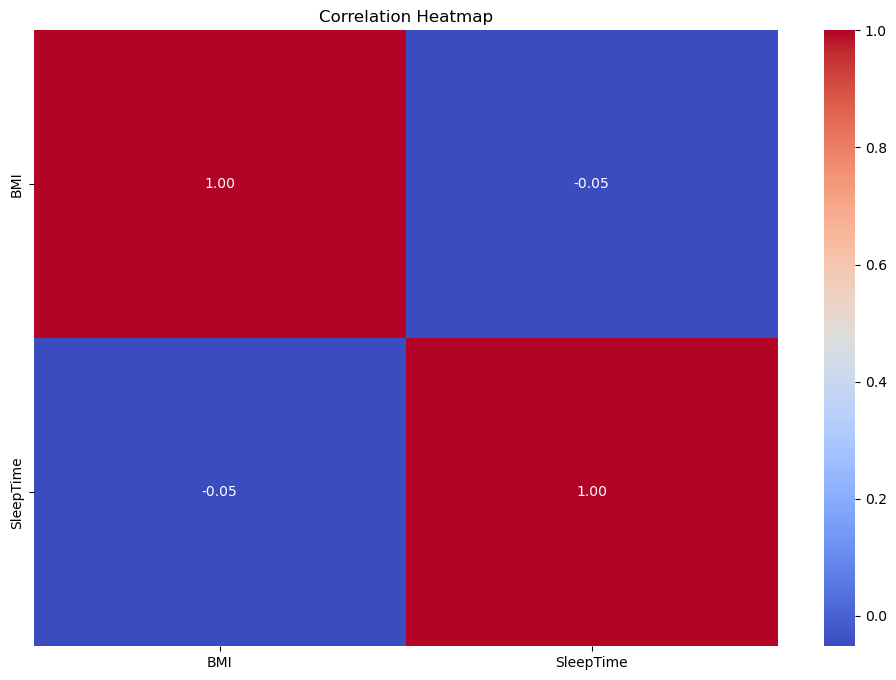

In [20]:
### This is only corr sleep and BMI

plt.figure(figsize=(12, 8))  # Adjust the figure size 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Finding Relations

# Findings 1

### Finding the relationship between **Heart disease** and all **Risk Factors** :

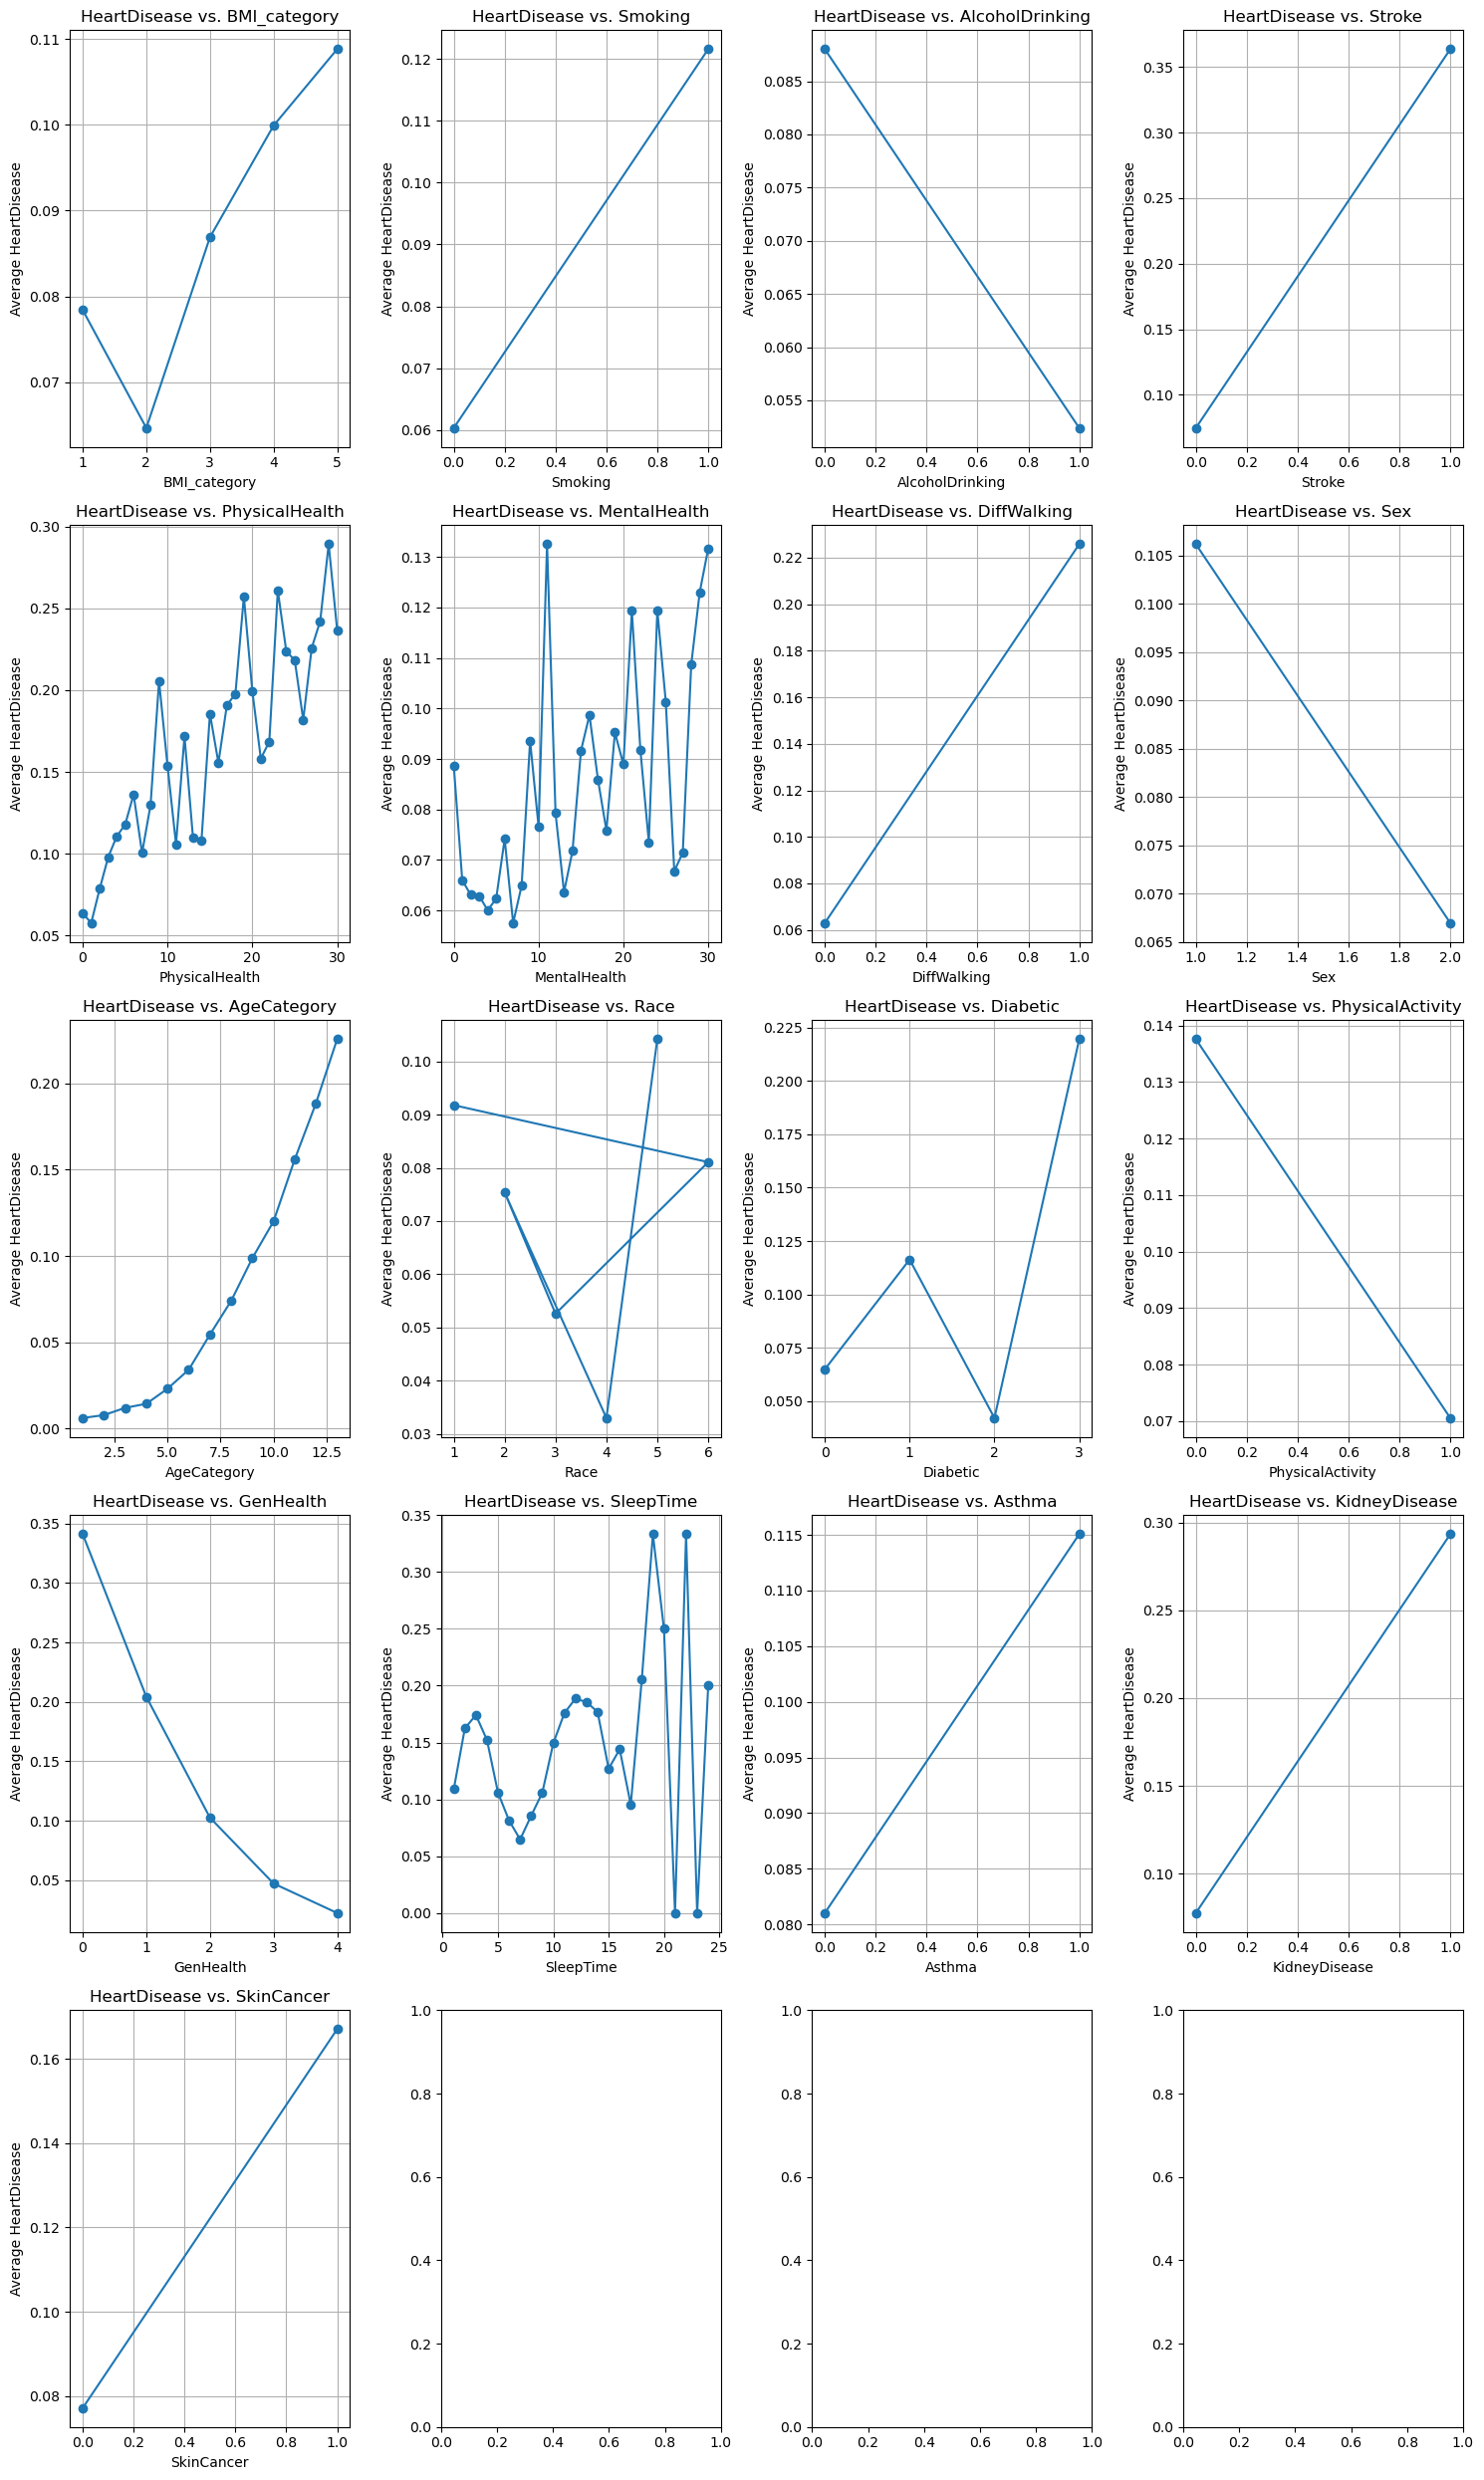

In [21]:

def plot_line_charts(df, risk_factors):
    num_factors = len(risk_factors)
    num_rows = (num_factors + 3) // 4  # Rows for subplots
    num_cols = min(num_factors, 4)  # Maximum 4 columns
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

    for i, factor in enumerate(risk_factors):
        row = i // num_cols
        col = i % num_cols

        # Grouping by risk factor and calculating mean HeartDisease values
        grouped = df.groupby(factor)['HeartDisease'].mean().reset_index()
        grouped = grouped.sort_values(by=factor)

        # Plotting line charts for each risk factor
        axes[row, col].plot(grouped[factor], grouped['HeartDisease'], marker='o')
        axes[row, col].set_title(f'HeartDisease vs. {factor}')
        axes[row, col].set_xlabel(factor)
        axes[row, col].set_ylabel('Average HeartDisease')
        axes[row, col].grid(True)

    # Adjusting layout and displaying the plot
    plt.tight_layout()
    plt.show()


risk_factors = ['BMI_category', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 
                'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 
                'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 
                'Asthma', 'KidneyDisease', 'SkinCancer']

plot_line_charts(df, risk_factors)


# Findings 2

The risk increase by age

Asian have the least risk in all race

Females are at higher risk than males

Yes (during pregnancy) diabetes have the least risk !!!!

Sleep time of 7 hours is best to reduce the risk of heart disease - not less, not more

Drinking alchol seems to have a better ratio than not driking.

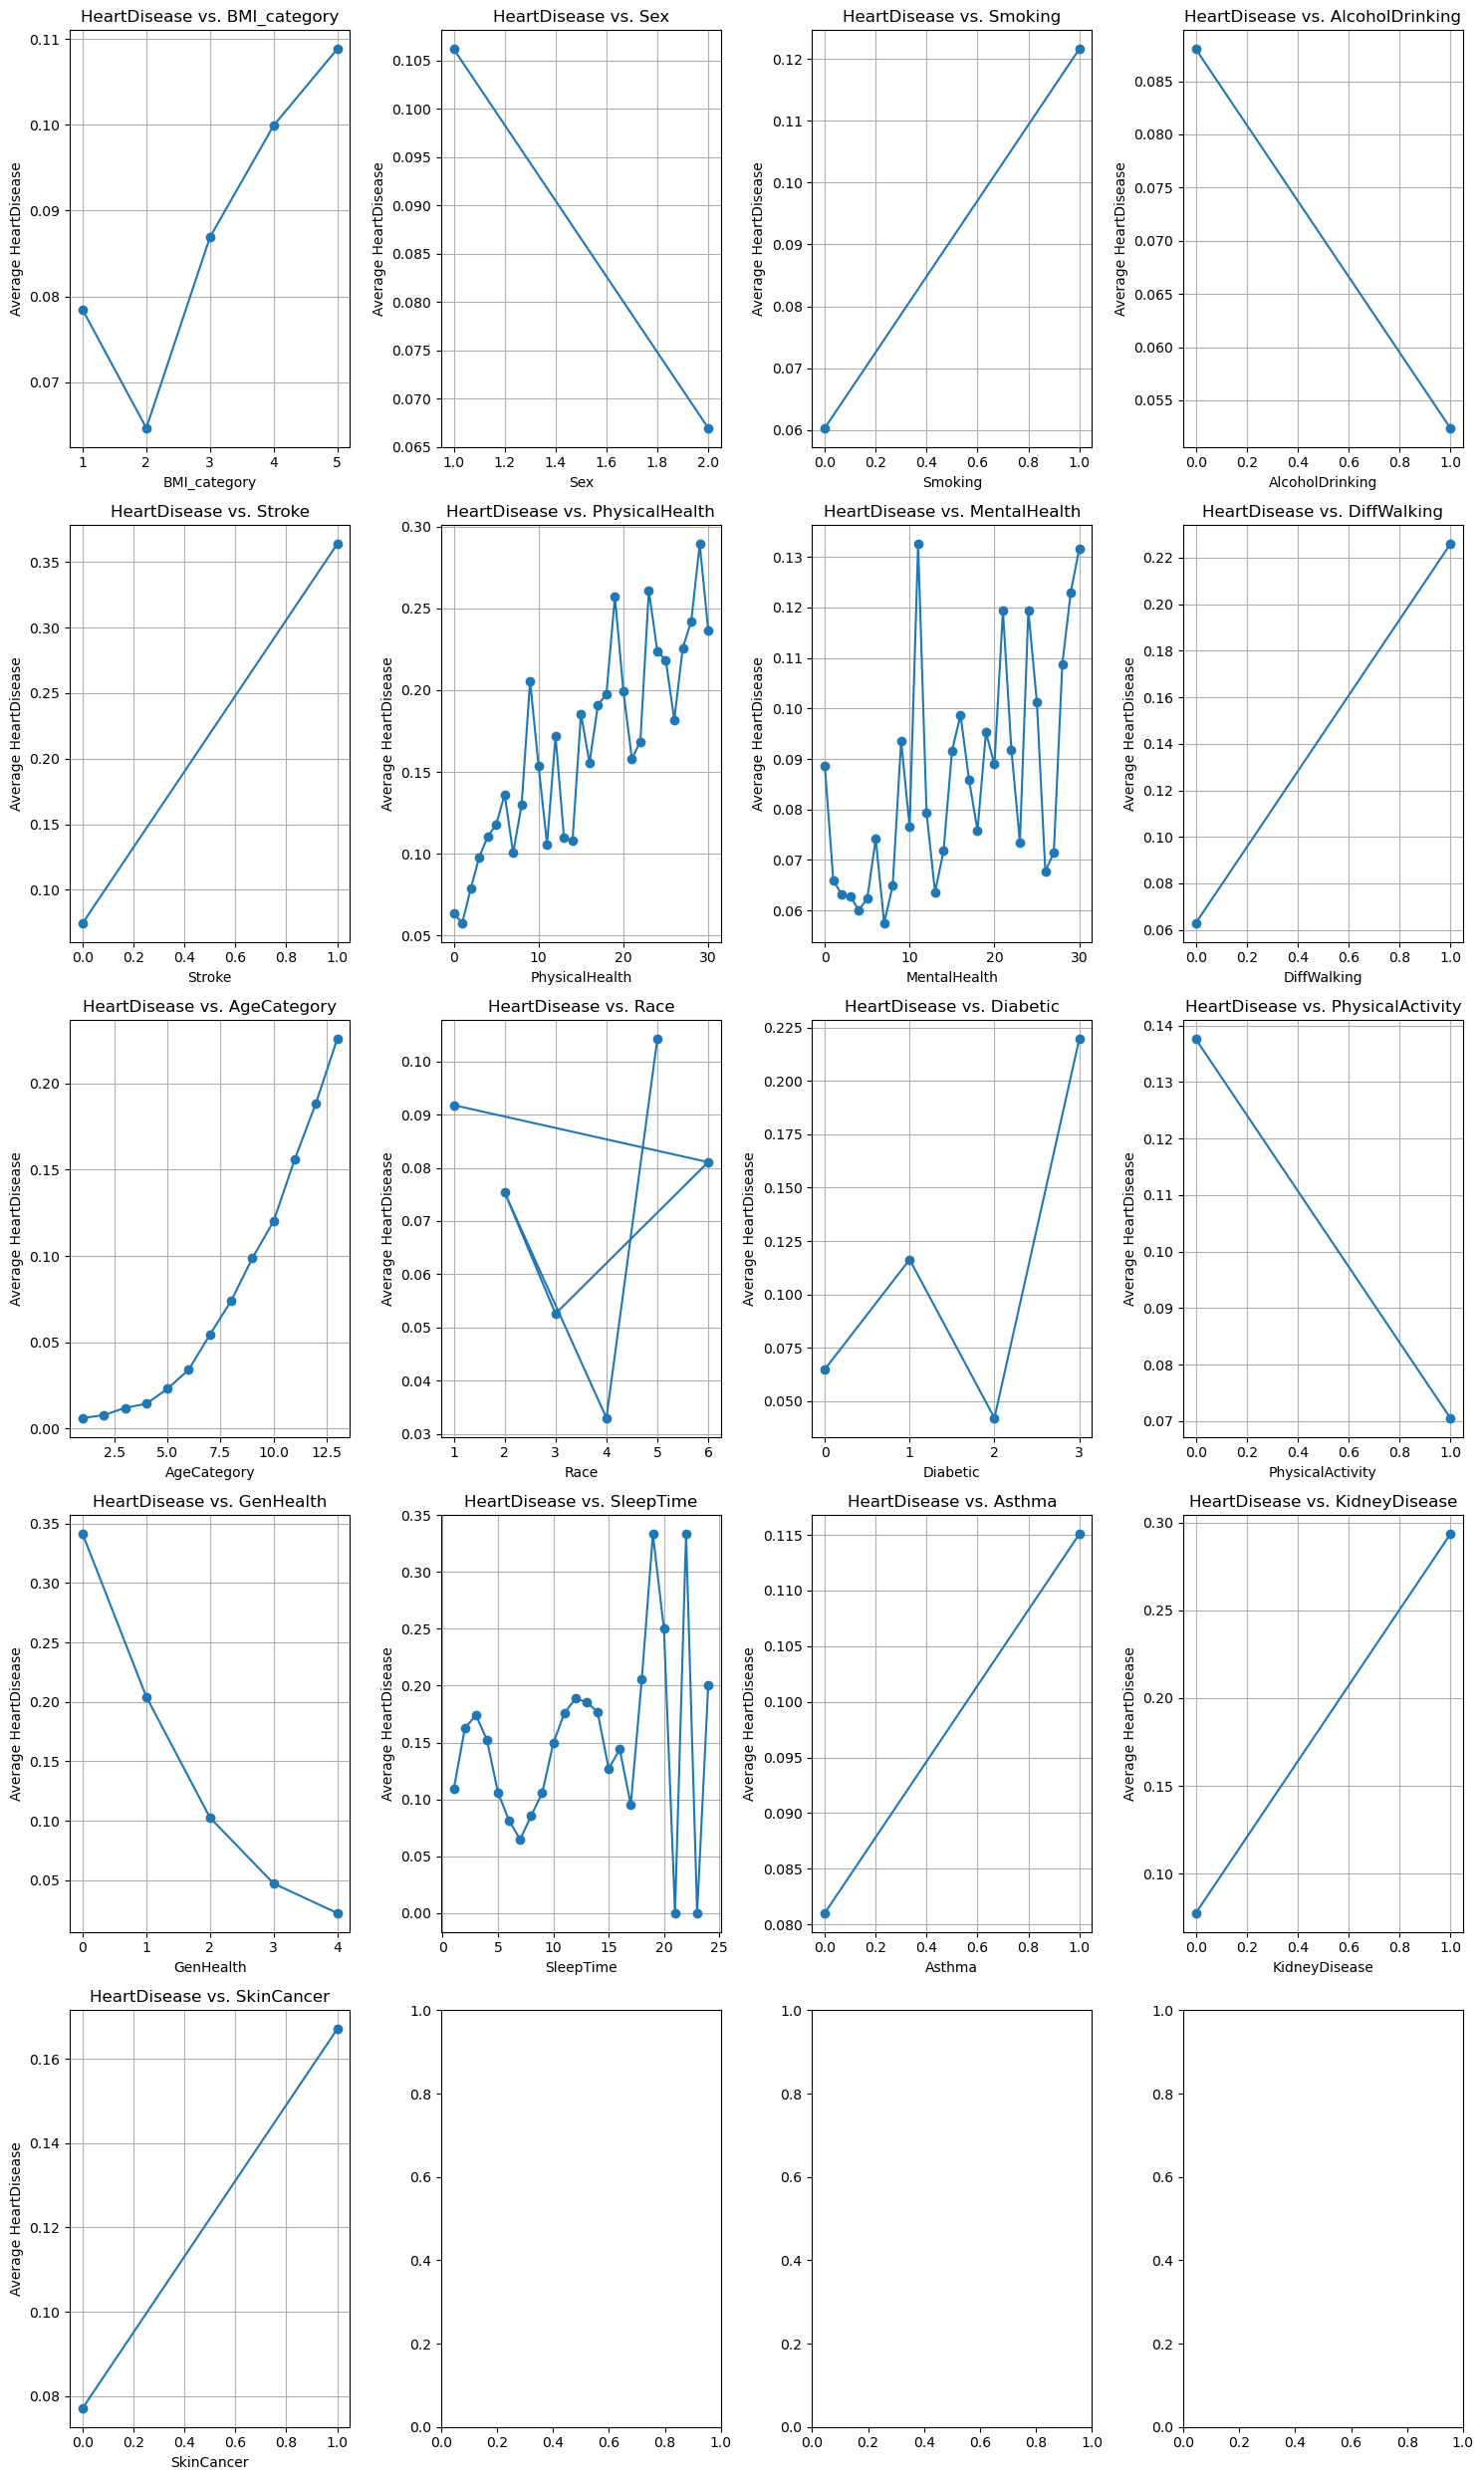

In [22]:

def plot_factor_vs_target(df, target_variable, risk_factors):
    num_factors = len(risk_factors)
    num_rows = (num_factors + 3) // 4  # Rows for subplots
    num_cols = min(num_factors, 4)  # Maximum 4 columns
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

    for i, factor in enumerate(risk_factors):
        row = i // num_cols
        col = i % num_cols

        # Grouping by risk factor and calculating mean of the target variable
        grouped = df.groupby(factor)[target_variable].mean().reset_index()
        grouped = grouped.sort_values(by=factor)

        # Plotting line charts for each risk factor
        axes[row, col].plot(grouped[factor], grouped[target_variable], marker='o')
        axes[row, col].set_title(f'{target_variable} vs. {factor}')
        axes[row, col].set_xlabel(factor)
        axes[row, col].set_ylabel(f'Average {target_variable}')
        axes[row, col].grid(True)

    # Adjusting layout and displaying the plot
    plt.tight_layout()
    plt.show()


# Example usage:
target_variable = 'HeartDisease'  # Change this to 'HeartDisease' if needed
risk_factors = ['BMI_category', 'Sex', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 
                'MentalHealth', 'DiffWalking', 'AgeCategory', 'Race', 
                'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 
                'Asthma', 'KidneyDisease', 'SkinCancer']

plot_factor_vs_target(df, target_variable, risk_factors)



In [23]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Sort correlations with respect to 'HeartDisease'
correlation_with_target = correlation_matrix['HeartDisease'].sort_values(ascending=False)

# Remove the target variable from the list
correlation_with_target = correlation_with_target.drop('HeartDisease')


#This is the corr of Heart Disease and all other factors
correlation_with_target

AgeCategory         0.233432
DiffWalking         0.201258
Stroke              0.196835
Diabetic            0.180826
PhysicalHealth      0.170721
KidneyDisease       0.145197
Smoking             0.107764
SkinCancer          0.093317
BMI_category        0.053263
BMI                 0.051803
Asthma              0.041444
MentalHealth        0.028591
SleepTime           0.008327
Race               -0.029538
AlcoholDrinking    -0.032080
Sex                -0.070040
PhysicalActivity   -0.100030
GenHealth          -0.243182
Name: HeartDisease, dtype: float64

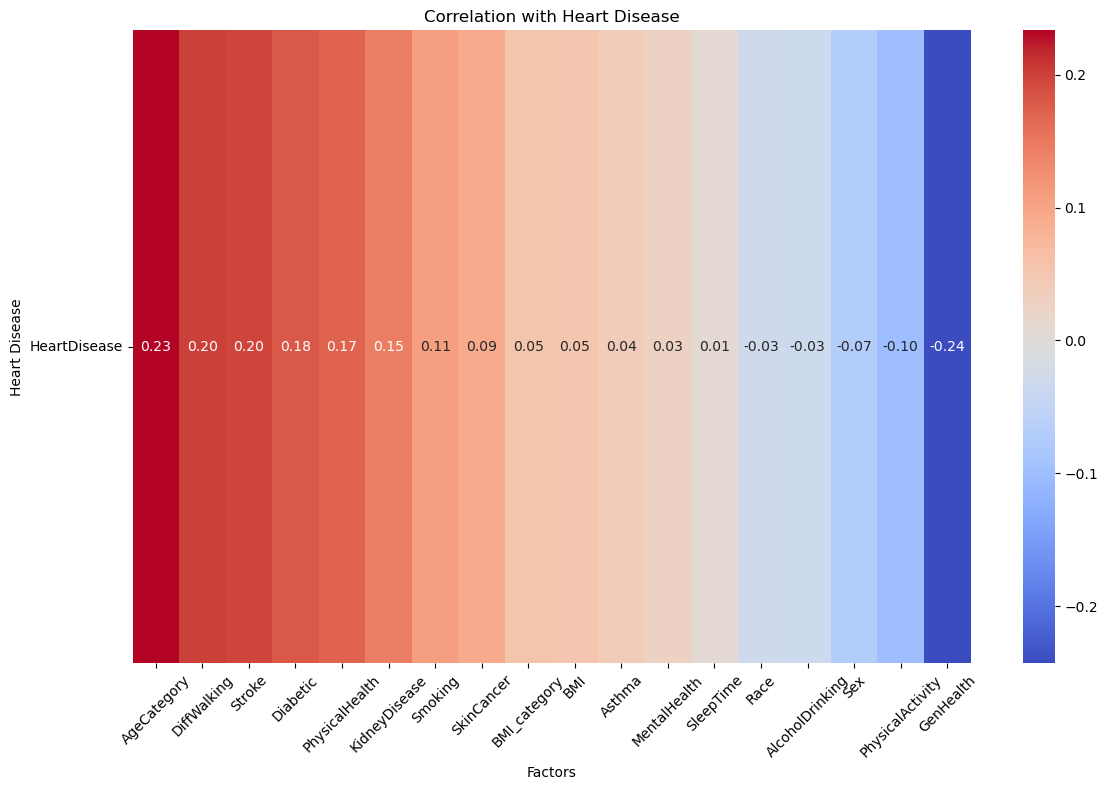

In [24]:

# Extract correlation values for HeartDisease and other factors
correlation_values = df[correlation_with_target.index].corrwith(df['HeartDisease'])

# Construct a new correlation matrix based on the correlation with HeartDisease
correlation_with_heart = df[correlation_with_target.index].corrwith(df['HeartDisease'])

# Reshape the correlation values to create a correlation matrix
correlation_matrix_heart = correlation_with_heart.values.reshape(1, -1)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_heart, annot=True, fmt='.2f', cmap='coolwarm',
            xticklabels=correlation_with_heart.index, yticklabels=['HeartDisease'])
plt.title('Correlation with Heart Disease')
plt.xlabel('Factors')
plt.ylabel('Heart Disease')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


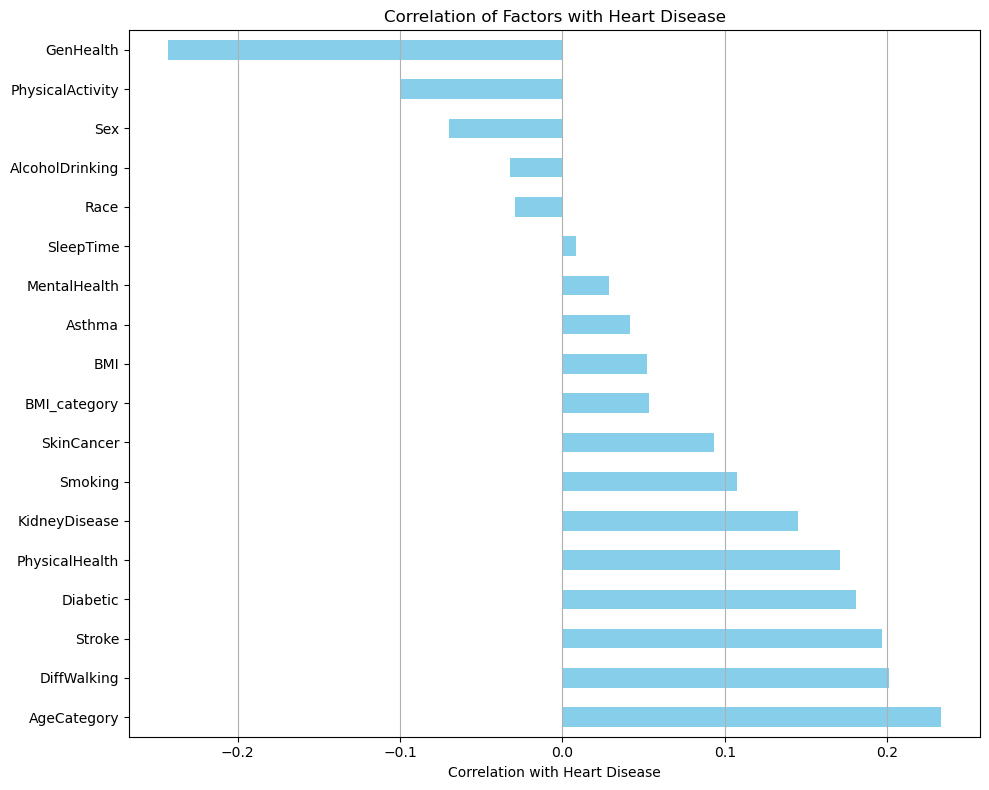

In [25]:
#Same but diffrent ploting:


# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
correlation_values.plot(kind='barh', color='skyblue')
plt.xlabel('Correlation with Heart Disease')
plt.title('Correlation of Factors with Heart Disease')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


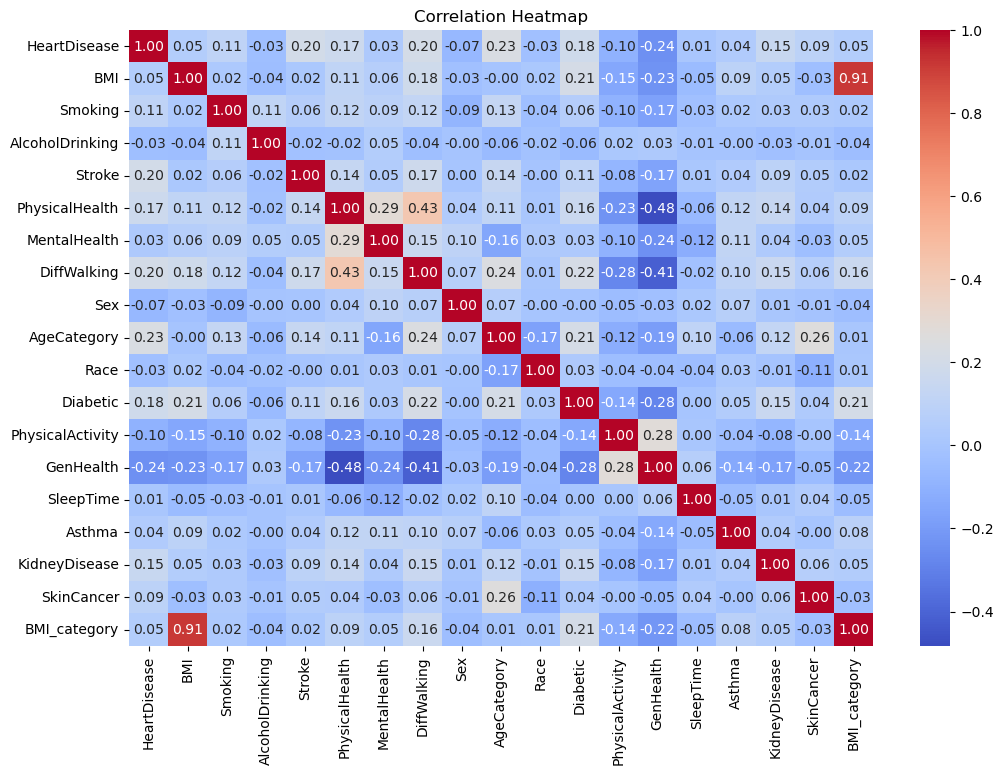

In [26]:
# Here to show visual Data, but its all the Data (its diffrent from the previouse corr)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # cmap can be changed for different color palettes
plt.title('Correlation Heatmap')
plt.show()


In [27]:
df.columns


Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'BMI_category'],
      dtype='object')

# Answering the questions

# What is the most important factor in determining heart disease?

In [28]:
#as grouped by sex and age
grouped_data = df.groupby(['Sex', 'AgeCategory'])
correlation_data = grouped_data.corr()

correlation_data

HeartDisease       BMI   Smoking  \
Sex AgeCategory                                                     
1   1           HeartDisease         1.000000  0.004005  0.019500   
                BMI                  0.004005  1.000000  0.015679   
                Smoking              0.019500  0.015679  1.000000   
                AlcoholDrinking      0.002549  0.016968  0.189248   
                Stroke               0.238818  0.003854  0.029428   
...                                       ...       ...       ...   
2   13          SleepTime           -0.016009 -0.014081  0.014606   
                Asthma               0.051721  0.086508  0.046451   
                KidneyDisease        0.129624  0.080772  0.014864   
                SkinCancer           0.027782  0.000637  0.022457   
                BMI_category         0.060657  0.932468 -0.007173   

                                 AlcoholDrinking    Stroke  PhysicalHealth  \
Sex AgeCategory                                                              
1   1           HeartDisease            0.002549  0.238818        0.059831   
                BMI                     0.016968  0.003854        0.046417   
                Smoking                 0.189248  0.029428        0.078944   
                AlcoholDrinking         1.000000  0.022091        0.026061   
                Stroke                  0.022091  1.000000        0.048862   
...                                          ...       ...             ...   
2   13          SleepTime               0.014112  0.002085       -0.012597   
                Asthma                  0.006256  0.038296        0.083312   
                KidneyDisease           0.000010  0.077351        0.124079   
                SkinCancer              0.036234  0.032436        0.035321   
                BMI_category           -0.027325  0.022083        0.074036   

                                 MentalHealth  DiffWalking      Race  \
Sex AgeCategory                                                        
1   1           HeartDisease         0.035830     0.060121  0.001546   
                BMI                  0.016072     0.063084  0.028671   
                Smoking              0.139742     0.069096 -0.023674   
                AlcoholDrinking      0.063790     0.020095 -0.015968   
                Stroke               0.061491     0.038054  0.006127   
...                                       ...          ...       ...   
2   13          SleepTime           -0.017431     0.012276 -0.037132   
                Asthma               0.040107     0.093611  0.021230   
                KidneyDisease        0.039785     0.101009  0.001766   
                SkinCancer           0.039519     0.030629 -0.086227   
                BMI_category         0.014389     0.230879  0.007075   

                                 Diabetic  PhysicalActivity  GenHealth  \
Sex AgeCategory                                                          
1   1           HeartDisease     0.073593         -0.011477  -0.039374   
                BMI              0.048415         -0.045885  -0.158045   
                Smoking          0.023073         -0.056352  -0.124258   
                AlcoholDrinking  0.003876         -0.003222  -0.013059   
                Stroke           0.067949         -0.015540  -0.020899   
...                                   ...               ...        ...   
2   13          SleepTime       -0.002797         -0.034031   0.027069   
                Asthma           0.033580         -0.017645  -0.103289   
                KidneyDisease    0.111206         -0.063187  -0.166761   
                SkinCancer      -0.019552          0.030245  -0.028793   
                BMI_category     0.203857         -0.154921  -0.127534   

                                 SleepTime    Asthma  KidneyDisease  \
Sex AgeCategory                                                       
1   1           HeartDisease      0.031370  0.036358       0.082717   
       

In [29]:
heart_bmi_correlation = correlation_data.loc[:, ('HeartDisease')]
heart_bmi_correlation

Sex  AgeCategory                 
1    1            HeartDisease       1.000000
                  BMI                0.004005
                  Smoking            0.019500
                  AlcoholDrinking    0.002549
                  Stroke             0.238818
                                       ...   
2    13           SleepTime         -0.016009
                  Asthma             0.051721
                  KidneyDisease      0.129624
                  SkinCancer         0.027782
                  BMI_category       0.060657
Name: HeartDisease, Length: 442, dtype: float64

In [30]:
#as My understanding the most important factor, is the factor which have more corr , If you agree the next is true

# Calculate correlations with 'HeartDisease'
correlation_with_heart = df.corr()['HeartDisease'].drop('HeartDisease').abs().sort_values(ascending=False)

# Display the most correlated factor
most_important_factor = correlation_with_heart.index[0]
print(f"The most important factor in determining heart disease is: {most_important_factor}")


The most important factor in determining heart disease is: GenHealth


In [31]:

#This is extra just to test, its machine learing - Random Forest Classifier Modeel




from sklearn.ensemble import RandomForestClassifier


target = 'HeartDisease'
features = [ 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer']  # Include all relevant features

# Separate features and target variable
X = df[features]
y = df[target]

# Initialize RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
clf.fit(X, y)

# Feature importances
feature_importances = pd.DataFrame({'Feature': features, 'Importance': clf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Most important factor
most_important = feature_importances.iloc[0]['Feature']
print(f"The most important factor in determining heart disease is: {most_important}")


The most important factor in determining heart disease is: BMI


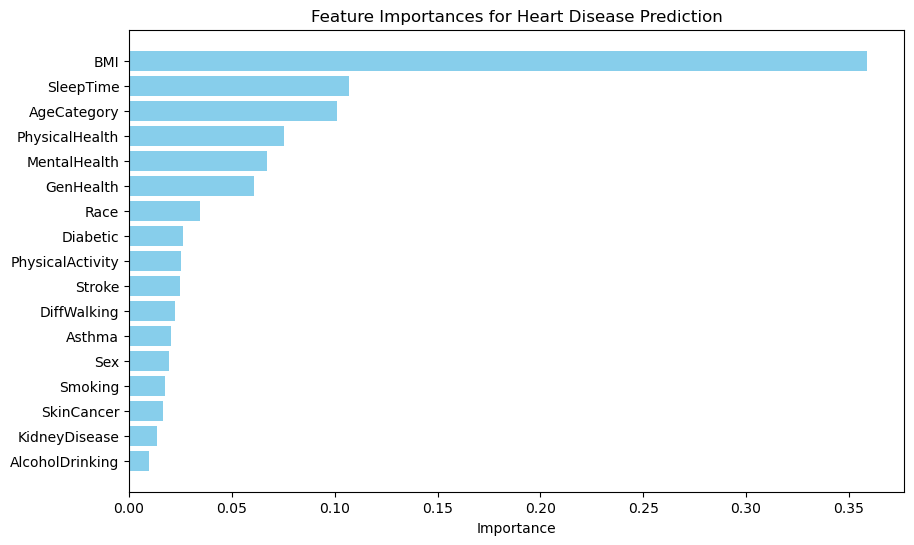

In [32]:
#This is ploting the MAhine Learing Model NOT The only corr- 

# Assuming 'feature_importances' contains your DataFrame with feature importances

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances for Heart Disease Prediction')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


# What are the highest coorelated factors for heart disease?

In [33]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Sort correlations with respect to 'HeartDisease'
correlation_with_target = correlation_matrix['HeartDisease'].sort_values(ascending=False)

# Remove the target variable from the list
correlation_with_target = correlation_with_target.drop('HeartDisease')

# Filter out factors with highest absolute correlation values
top_factors = correlation_with_target.abs().nlargest(5).index  # Change '5' to show more or fewer factors
top_factors

Index(['GenHealth', 'AgeCategory', 'DiffWalking', 'Stroke', 'Diabetic'], dtype='object')

### Need Revision

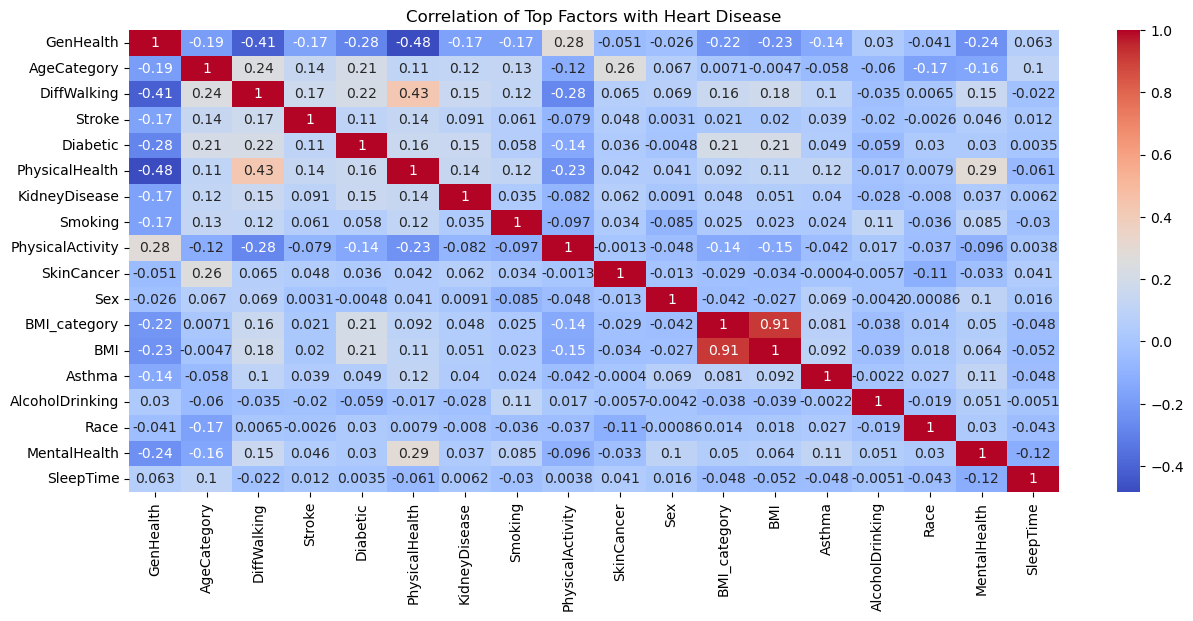

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Sort correlations with respect to 'HeartDisease'
correlation_with_target = correlation_matrix['HeartDisease'].sort_values(ascending=False)

# Remove the target variable from the list
correlation_with_target = correlation_with_target.drop('HeartDisease')

# Filter out factors with highest absolute correlation values
top_factors = correlation_with_target.abs().nlargest(20).index  # Change '5' to show more or fewer factors

# Filter the correlation matrix for top factors
top_factors_corr = df[top_factors].corr()

# Plotting the highest correlated factors
plt.figure(figsize=(15, 6))
sns.heatmap(top_factors_corr, annot=True, cmap='coolwarm')
plt.title('Correlation of Top Factors with Heart Disease')
plt.show()

# What groups are the most at risk for heart attacks?

## Age and Gender

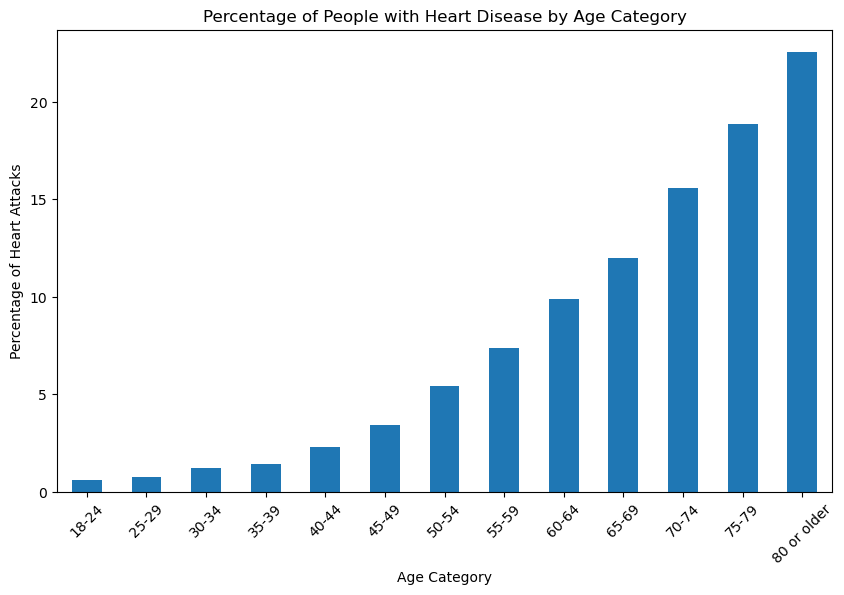

In [35]:
# The other graph showed a raw count instead of percentage in the age group, figured this would be more accurate.

# Group by 'AgeCategory' and calculate the total count and count of heart attacks
age_group_totals = df.groupby('AgeCategory').size()
age_group_heart_disease = df.groupby('AgeCategory')['HeartDisease'].sum()

# Calculate the percentage of people with heart disease in each age group
percentage_heart_disease = (age_group_heart_disease / age_group_totals) * 100

# Create a reverse mapping from your age_map to convert numbers to age ranges
reverse_age_map = {i: j for j, i in age_map.items()}

# Map the numeric categories to textual labels
percentage_heart_disease.index = percentage_heart_disease.index.map(reverse_age_map)

# Visualizing the percentage of heart attacks by age category
percentage_heart_disease.plot(kind='bar', figsize=(10, 6), title='Percentage of People with Heart Disease by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Percentage of Heart Attacks')
plt.xticks(rotation=45)
plt.show()

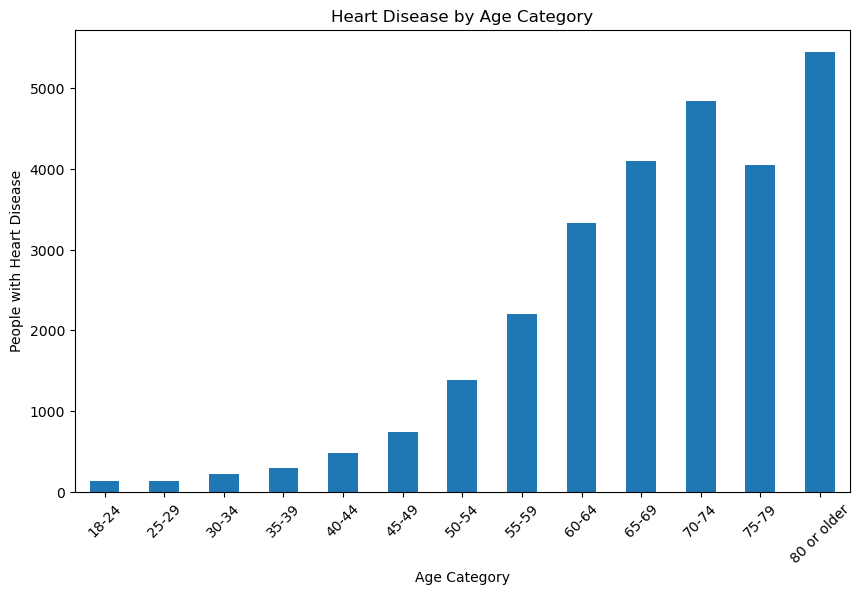

In [36]:
# Grouping by 'AgeCategory' and calculating the count of heart attacks
age_groups = df.groupby('AgeCategory')['HeartDisease'].sum()

# Create a reverse mapping from your age_map to convert numbers to age ranges
reverse_age_map = {i: j for j, i in age_map.items()}

# Map the numeric categories to textual labels
age_groups.index = age_groups.index.map(reverse_age_map)

# Visualizing the count of heart attacks by age category
age_groups.plot(kind='bar', figsize=(10, 6), title='Heart Disease by Age Category')
plt.xlabel('Age Category')
plt.ylabel('People with Heart Disease')
plt.xticks(rotation=45)
plt.show()

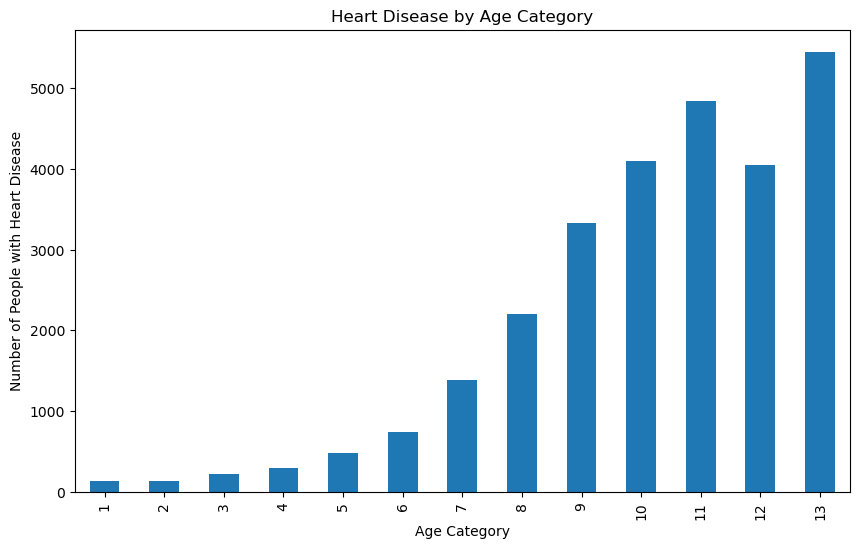

In [37]:

# Grouping by 'AgeCategory' and calculating the count of heart attacks
age_groups = df.groupby('AgeCategory')['HeartDisease'].sum()

# Visualizing the count of heart attacks by age category
age_groups.plot(kind='bar', figsize=(10, 6), title='Heart Disease by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Number of People with Heart Disease')
plt.show()


## Smoking

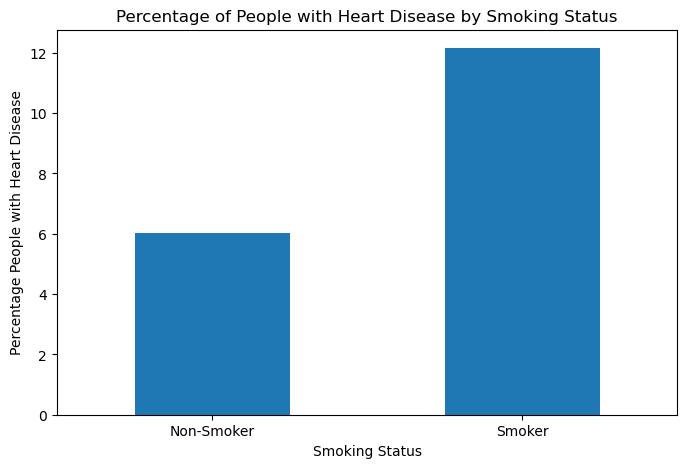

In [38]:
# Changed to percentage of group instead of raw count

# Group by 'Smoking' and calculate the total count and count of heart attacks
smoking_group_totals = df.groupby('Smoking').size()
smoking_group_heart_disease = df.groupby('Smoking')['HeartDisease'].sum()

# Calculate the percentage of people with heart disease in each smoking group
percentage_heart_disease_smoking = (smoking_group_heart_disease / smoking_group_totals) * 100

# Visualizing the percentage of heart attacks among smokers and non-smokers
percentage_heart_disease_smoking.plot(kind='bar', figsize=(8, 5), title='Percentage of People with Heart Disease by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Percentage People with Heart Disease')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'], rotation=0)
plt.show()

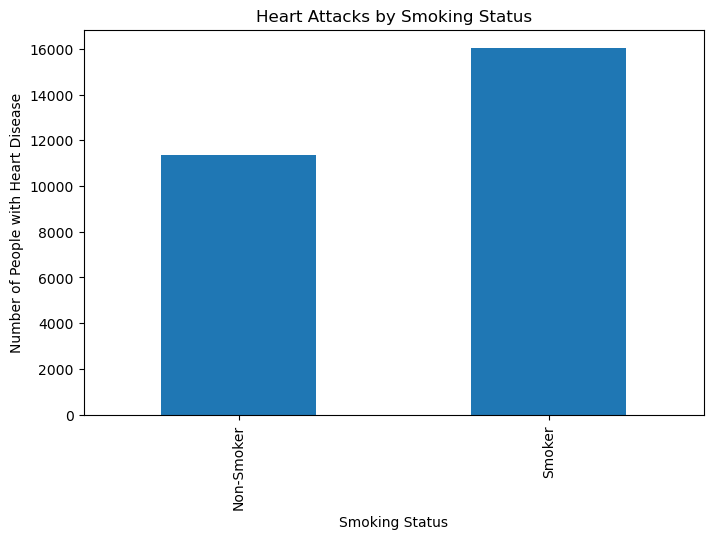

In [39]:
# Grouping by 'Smoking' and calculating the count of heart attacks
smoking_groups = df.groupby('Smoking')['HeartDisease'].sum()

# Visualizing the count of heart attacks among smokers and non-smokers
smoking_groups.plot(kind='bar', figsize=(8, 5), title='Heart Attacks by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Number of People with Heart Disease')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.show()

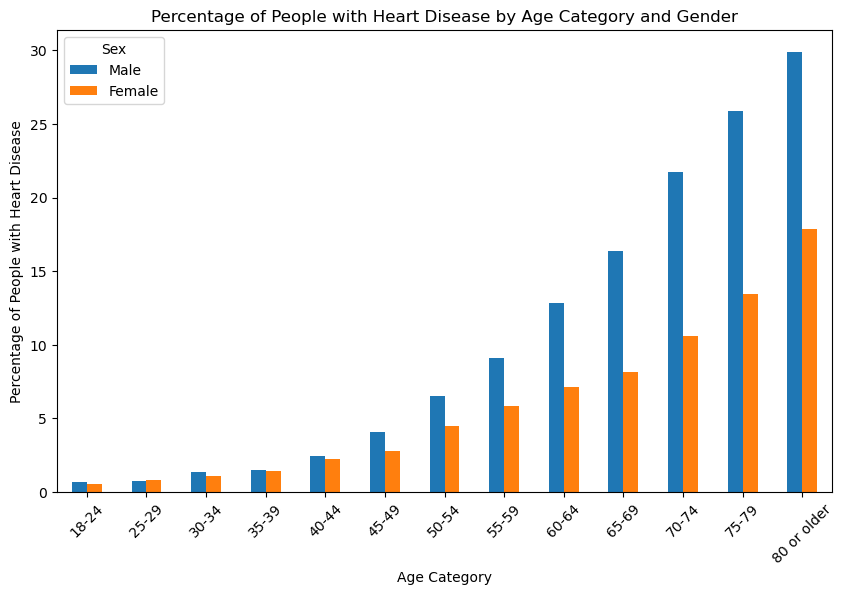

In [40]:
# Group by 'AgeCategory' and 'Sex', and calculate the total count and count of heart attacks
grouped_data = df.groupby(['AgeCategory', 'Sex']).agg(
    Total=('HeartDisease', 'size'),
    HeartDiseaseSum=('HeartDisease', 'sum')
)

# Calculate the percentage of people with heart disease in each group
grouped_data['Percentage'] = (grouped_data['HeartDiseaseSum'] / grouped_data['Total']) * 100

# Pivot this data for plotting
pivot_data = grouped_data['Percentage'].unstack()

# Create a reverse mapping from your age_map to convert numbers to age ranges
reverse_age_map = {i: j for j, i in age_map.items()}

# Map the numeric categories to textual labels in the pivot table index
pivot_data.index = pivot_data.index.map(reverse_age_map)

# Visualizing the percentage of heart attacks by age category and gender
pivot_data.plot(kind='bar', figsize=(10, 6), title='Percentage of People with Heart Disease by Age Category and Gender')
plt.xlabel('Age Category')
plt.ylabel('Percentage of People with Heart Disease')


# Update the legend labels to 'Male' and 'Female'
plt.legend(['Male', 'Female'], title='Sex')

plt.xticks(rotation=45)
plt.show()

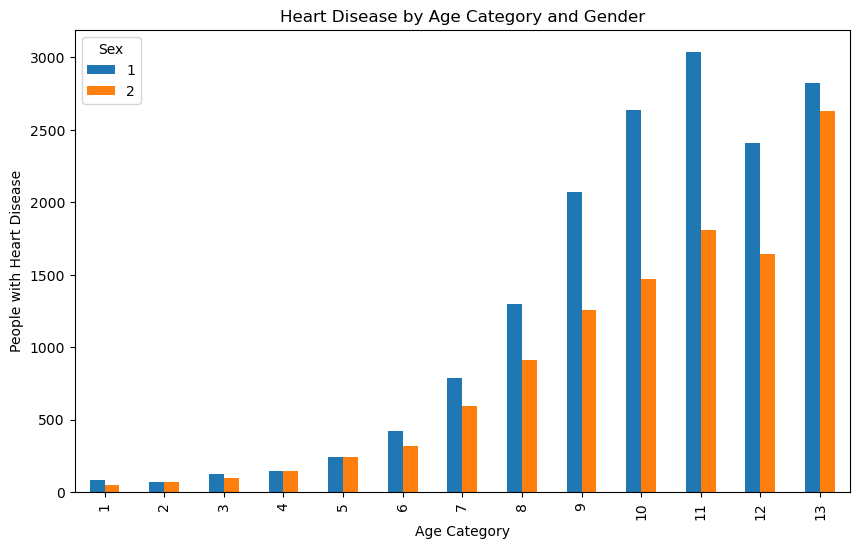

In [41]:
# Creating a pivot table to analyze heart attacks by age category and gender
age_gender_pivot = df.pivot_table(index='AgeCategory', columns='Sex', values='HeartDisease', aggfunc='sum')

# Visualizing heart attacks by age category and gender
age_gender_pivot.plot(kind='bar', figsize=(10, 6), title='Heart Disease by Age Category and Gender')
plt.xlabel('Age Category')
plt.ylabel('People with Heart Disease')
plt.show()

## Race and Heart Disease

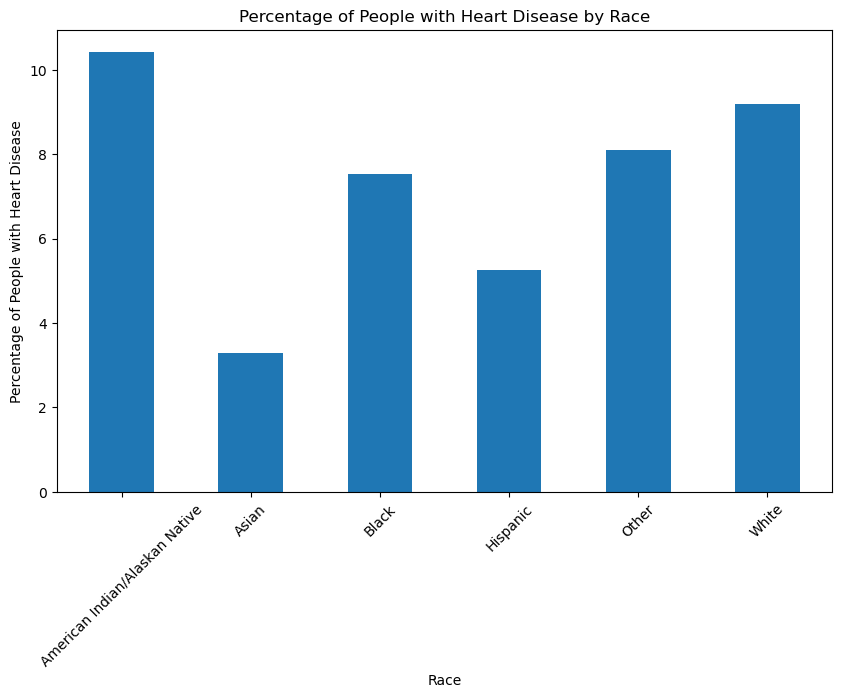

In [42]:
# Group by 'Race' and calculate the total count and count of heart attacks
race_group_totals = df.groupby('Race').size()
race_group_heart_disease = df.groupby('Race')['HeartDisease'].sum()

# Calculate the percentage of people with heart disease in each race group
percentage_heart_disease_race = (race_group_heart_disease / race_group_totals) * 100

# Check if the Series is empty
if not percentage_heart_disease_race.empty:
    # Create a reverse mapping from your race_map to convert numbers to race names
    reverse_race_map = {i: j for j, i in race_map.items()}

    # Map the numeric categories to race names for plotting
    percentage_heart_disease_race.index = percentage_heart_disease_race.index.map(reverse_race_map)

    # Visualizing the percentage of heart attacks by race
    percentage_heart_disease_race.plot(kind='bar', figsize=(10, 6), title='Percentage of People with Heart Disease by Race')
    plt.xlabel('Race')
    plt.ylabel('Percentage of People with Heart Disease')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("The data series is empty. Check the data preprocessing steps.")


# What could be the most important choices made to reverse the potential negative outcoes of heart disease?

1. Analyze Health-Related Factors:
Identify Positive Influences: Look at factors like physical activity, diet, medication adherence, and other health behaviors that are known to positively impact heart health.

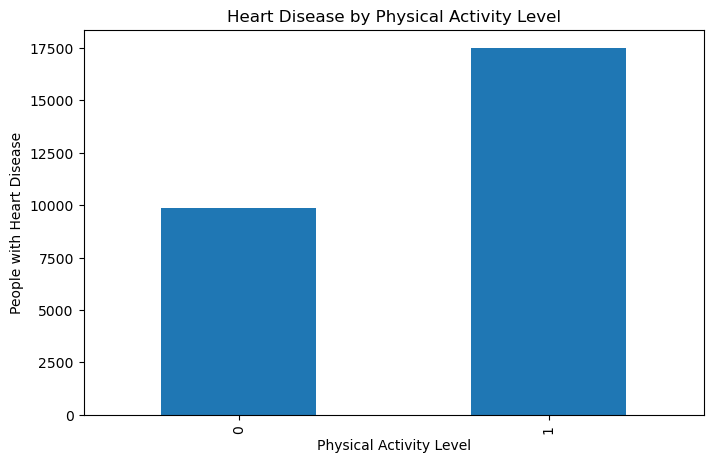

In [43]:

# Grouping by 'PhysicalActivity' and calculating heart disease occurrences
physical_activity_groups = df.groupby('PhysicalActivity')['HeartDisease'].sum()

# Visualizing heart attacks based on physical activity levels
physical_activity_groups.plot(kind='bar', figsize=(8, 5), title='Heart Disease by Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('People with Heart Disease')
plt.show()


2. Lifestyle and Behavioral Analysis:
Evaluate Lifestyle Choices: Consider factors like smoking cessation, healthy diet choices, reduced alcohol intake, and stress management that contribute to better heart health outcomes.

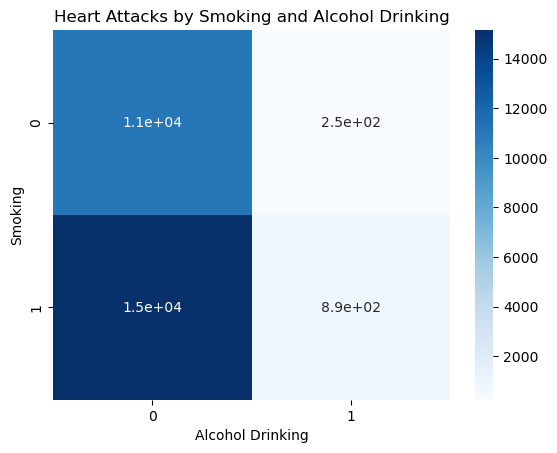

In [44]:

# Grouping by 'Smoking' and 'AlcoholDrinking' to analyze heart disease occurrences
lifestyle_groups = df.groupby(['Smoking', 'AlcoholDrinking'])['HeartDisease'].sum()

# Visualizing heart attacks based on smoking and alcohol consumption
# This might require different visualization techniques like stacked bar plots or heatmaps
# Here's an example using a heatmap:
lifestyle_pivot = lifestyle_groups.unstack()
sns.heatmap(lifestyle_pivot, annot=True, cmap='Blues')
plt.title('Heart Attacks by Smoking and Alcohol Drinking')
plt.xlabel('Alcohol Drinking')
plt.ylabel('Smoking')
plt.show()


3. Treatment and Management:
Examine Treatment and Management: Explore the impact of regular check-ups, medication adherence, and timely medical interventions on reducing the severity or complications of heart disease.

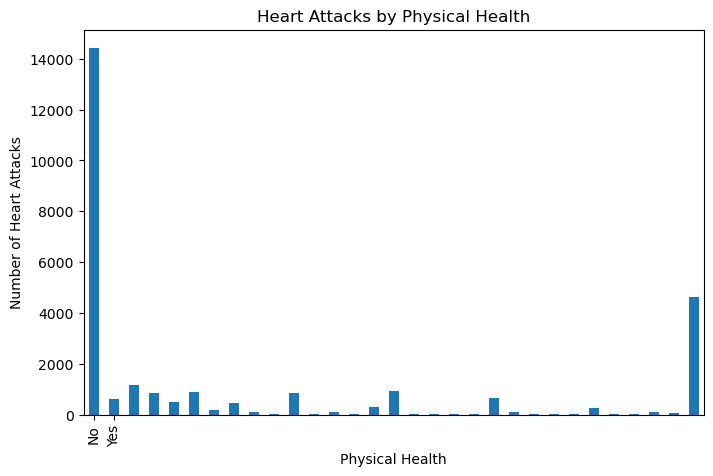

In [45]:

# Grouping by 'RegularCheckup' and calculating heart disease occurrences
checkup_groups = df.groupby('PhysicalHealth')['HeartDisease'].sum()

# Visualizing heart attacks based on regular check-ups
checkup_groups.plot(kind='bar', figsize=(8, 5), title='Heart Attacks by Physical Health')
plt.xlabel('Physical Health')
plt.ylabel('Number of Heart Attacks')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


In [46]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'BMI_category'],
      dtype='object')

In [47]:
df[["PhysicalHealth"]].value_counts()

PhysicalHealth
0.0               226589
30.0               19509
2.0                14880
1.0                10489
3.0                 8617
5.0                 7606
10.0                5453
15.0                5012
7.0                 4629
4.0                 4468
20.0                3216
14.0                2893
6.0                 1270
25.0                1164
8.0                  924
21.0                 626
12.0                 605
28.0                 446
29.0                 204
9.0                  180
18.0                 167
16.0                 135
27.0                 124
17.0                 110
13.0                  91
22.0                  89
11.0                  85
24.0                  67
26.0                  66
23.0                  46
19.0                  35
Name: count, dtype: int64

## Difficulty Walking

In [48]:
# Recalculate the percentage of people with Difficulty Walking
diff_walking_percentage = df.groupby('AgeCategory')['DiffWalking'].mean() * 100

# Create a reverse mapping from the updated age map
reverse_age_map = {i: j for j, i in age_map.items()}

# Apply the reverse mapping to the index
diff_walking_percentage.index = diff_walking_percentage.index.map(reverse_age_map)

diff_walking_percentage

AgeCategory
18-24           1.552412
25-29           2.146859
30-34           3.130166
35-39           4.715328
40-44           6.288679
45-49           8.746730
50-54          12.244898
55-59          15.626575
60-64          17.728433
65-69          17.630523
70-74          19.916305
75-79          23.545294
80 or older    32.873763
Name: DiffWalking, dtype: float64

In [49]:
# Filter the DataFrame for those who have difficulty walking
df_diffwalking = df[df['DiffWalking'] == 1]

# Group by 'AgeCategory' and calculate the percentage of people with heart disease
diff_walking_heart_disease_percentage = df_diffwalking.groupby('AgeCategory')['HeartDisease'].mean() * 100

# Create a reverse mapping from the age map
reverse_age_map = {i: j for j, i in age_map.items()}

# Apply the reverse mapping to the index
diff_walking_heart_disease_percentage.index = diff_walking_heart_disease_percentage.index.map(reverse_age_map)

# Display the results
diff_walking_heart_disease_percentage

AgeCategory
18-24           3.363914
25-29           3.846154
30-34           5.621806
35-39           6.707946
40-44          10.825132
45-49          13.273872
50-54          16.795367
55-59          19.182796
60-64          21.282652
65-69          23.002823
70-74          25.828350
75-79          28.469751
80 or older    30.239295
Name: HeartDisease, dtype: float64

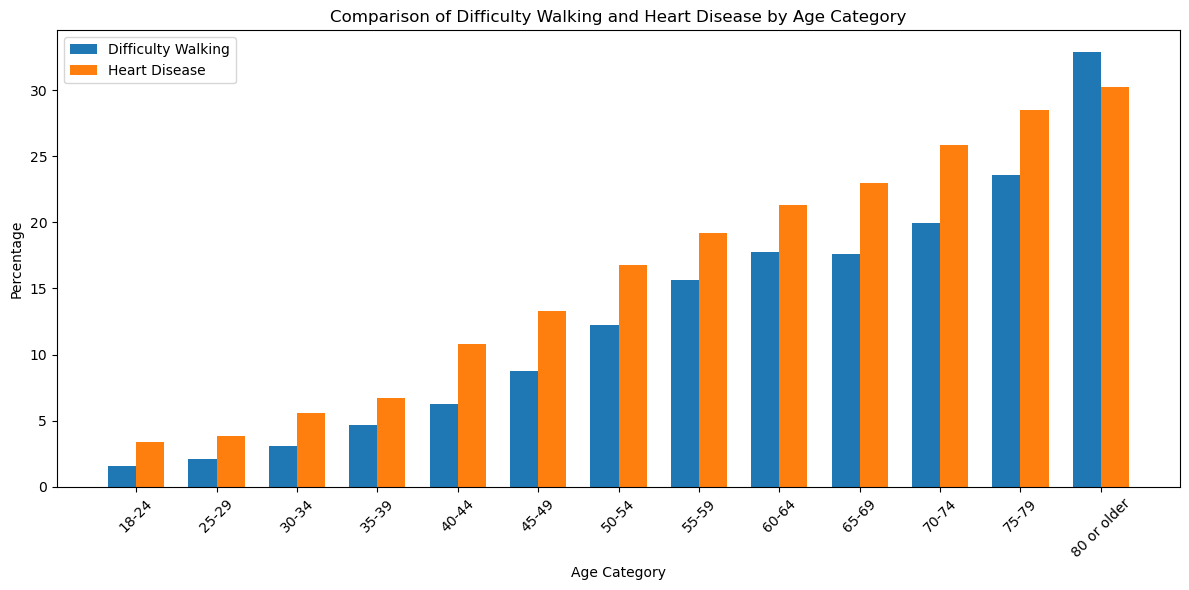

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming diff_walking_percentage and diff_walking_heart_disease_percentage are your Series from the previous calculations

# Convert the Series to DataFrames
df_diff_walking = diff_walking_percentage.reset_index()
df_diff_walking_heart_disease = diff_walking_heart_disease_percentage.reset_index()

# Rename the columns for clarity
df_diff_walking.columns = ['AgeCategory', 'PercentageDifficultyWalking']
df_diff_walking_heart_disease.columns = ['AgeCategory', 'PercentageHeartDisease']

# Merge the DataFrames on 'AgeCategory'
merged_df = pd.merge(df_diff_walking, df_diff_walking_heart_disease, on='AgeCategory')

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
index = range(len(merged_df['AgeCategory']))

bar1 = plt.bar(index, merged_df['PercentageDifficultyWalking'], bar_width, label='Difficulty Walking')
bar2 = plt.bar([i + bar_width for i in index], merged_df['PercentageHeartDisease'], bar_width, label='Heart Disease')

plt.xlabel('Age Category')
plt.ylabel('Percentage')
plt.title('Comparison of Difficulty Walking and Heart Disease by Age Category')
plt.xticks([i + bar_width / 2 for i in index], merged_df['AgeCategory'], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [51]:
# Filter the DataFrame for those who have difficulty walking
no_df_diffwalking = df[df['DiffWalking'] == 0]

# Group by 'AgeCategory' and calculate the percentage of people with heart disease
no_diff_walking_heart_disease_percentage = no_df_diffwalking.groupby('AgeCategory')['HeartDisease'].mean() * 100

# Create a reverse mapping from the age map
reverse_age_map = {v: k for k, v in age_map.items()}

# Apply the reverse mapping to the index
no_diff_walking_heart_disease_percentage.index = no_diff_walking_heart_disease_percentage.index.map(reverse_age_map)

# Display the results
no_diff_walking_heart_disease_percentage

AgeCategory
18-24           0.573853
25-29           0.717256
30-34           1.062424
35-39           1.179715
40-44           1.742443
45-49           2.469198
50-54           3.865493
55-59           5.217668
60-64           7.418633
65-69           9.655172
70-74          13.059731
75-79          15.885290
80 or older    18.799729
Name: HeartDisease, dtype: float64

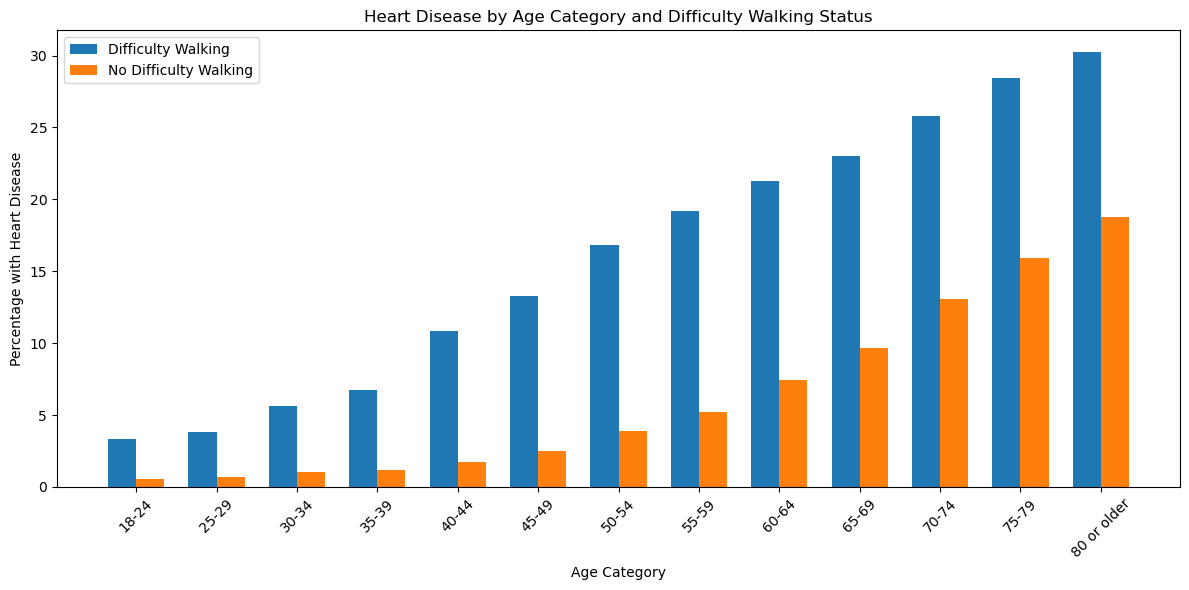

In [52]:
# Convert the Series to DataFrames for ease of plotting
df_with_diff_walking = diff_walking_heart_disease_percentage.reset_index()
df_no_diff_walking = no_diff_walking_heart_disease_percentage.reset_index()

# Rename the columns for clarity
df_with_diff_walking.columns = ['AgeCategory', 'PercentageWithHeartDiseaseDiffWalking']
df_no_diff_walking.columns = ['AgeCategory', 'PercentageWithHeartDiseaseNoDiffWalking']

# Merge the DataFrames on 'AgeCategory'
merged_df = pd.merge(df_with_diff_walking, df_no_diff_walking, on='AgeCategory')

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
index = range(len(merged_df['AgeCategory']))

bar1 = plt.bar(index, merged_df['PercentageWithHeartDiseaseDiffWalking'], bar_width, label='Difficulty Walking')
bar2 = plt.bar([i + bar_width for i in index], merged_df['PercentageWithHeartDiseaseNoDiffWalking'], bar_width, label='No Difficulty Walking')

plt.xlabel('Age Category')
plt.ylabel('Percentage with Heart Disease')
plt.title('Heart Disease by Age Category and Difficulty Walking Status')
plt.xticks([i + bar_width / 2 for i in index], merged_df['AgeCategory'], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# How will this data help hospitals to make informed decisions and develop effective business plans and strategies?


# Heart Health Analysis
##### This is for revision, I used outside sourse just for reference

## Risk Factor Analysis:
Identify High-Risk Groups: Analyze columns like 'Smoking', 'AlcoholDrinking', 'Diabetic', 'Stroke', 'BMI', 'PhysicalHealth', 'MentalHealth', etc., to identify high-risk groups susceptible to heart disease or related health issues.

## Health Behavior and Lifestyle:
Promote Healthier Behaviors: Assess 'PhysicalActivity', 'DiffWalking', 'SleepTime', and 'PhysicalHealth' to understand how lifestyle choices impact heart health. Hospitals can encourage healthier habits among patients.

## Demographic Insights:
Tailored Care for Demographics: Utilize 'Sex', 'AgeCategory', 'Race', etc., to understand demographic trends in heart disease prevalence. Hospitals can create targeted programs for specific demographics.

## Comorbidity and Complications:
Address Comorbidities: Explore 'Asthma', 'KidneyDisease', 'SkinCancer', and other health conditions to address potential complications or associations with heart disease.

## Health Management Strategies:
Develop Interventions: Use 'GenHealth' to gauge overall health perception. Hospitals can focus on interventions to improve patients' perceptions and self-care.

### Strategies and Decisions:
- **Strategic Resource Allocation:** Prioritize resources based on identified high-risk groups or prevalent conditions.
- **Tailored Interventions:** Develop targeted health programs or educational campaigns addressing identified risk factors.
- **Improved Patient Care:** Implement personalized care plans based on demographic insights and health behaviors.
- **Preventive Healthcare:** Focus on preventive measures targeting lifestyle choices contributing to heart disease.
- **Data-Informed Planning:** Use insights for long-term planning, resource allocation, and strategic development.

By leveraging this data, hospitals can tailor their services, interventions, and strategies to better address heart disease and related health issues within their communities, ultimately enhancing patient care and outcomes.


### Risk Factor Analysis:

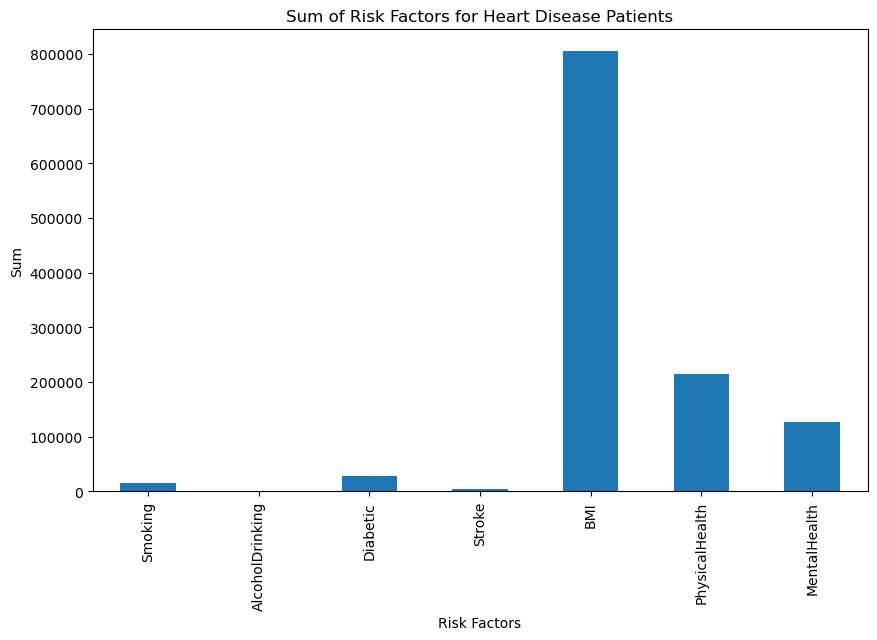

In [53]:
# Analyzing risk factors for heart disease
risk_factors = ['Smoking', 'AlcoholDrinking', 'Diabetic', 'Stroke', 'BMI', 'PhysicalHealth', 'MentalHealth']

# Summarizing risk factors for patients with heart disease
df_heart_disease = df[df['HeartDisease'] == 1]  # Selecting patients with heart disease
risk_factor_summary = df_heart_disease[risk_factors].sum()

# Visualizing risk factor summary
risk_factor_summary.plot(kind='bar', figsize=(10, 6), title='Sum of Risk Factors for Heart Disease Patients')
plt.xlabel('Risk Factors')
plt.ylabel('Sum')
plt.show()


### Health Behavior and Lifestyle:

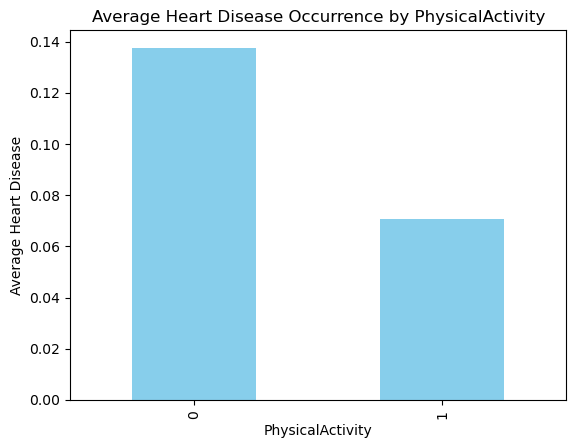

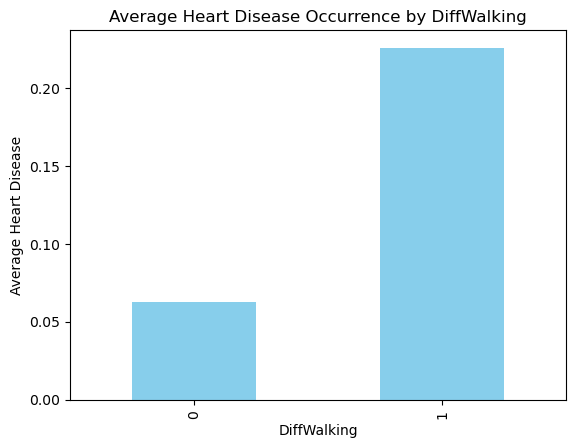

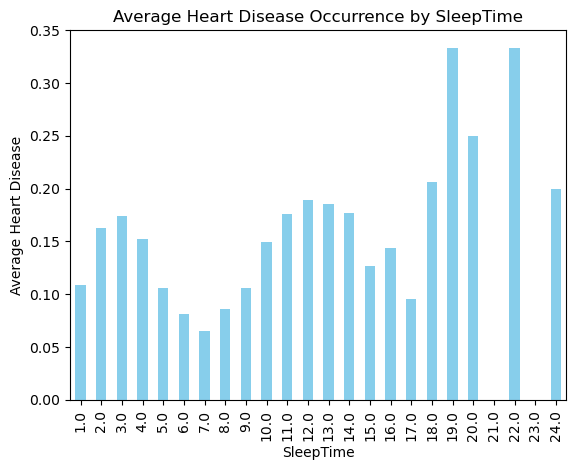

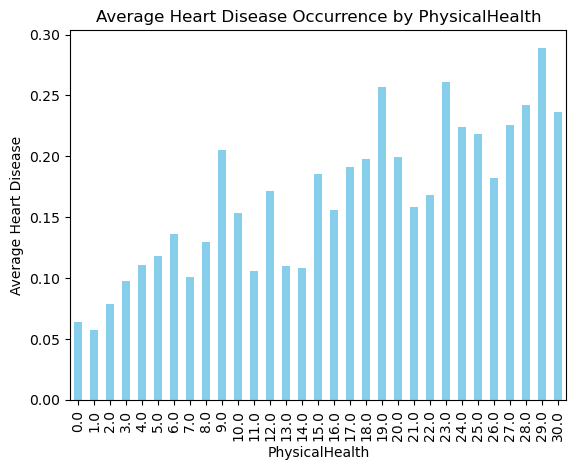

In [54]:
# Analyzing health behaviors impacting heart health
health_behaviors = ['PhysicalActivity', 'DiffWalking', 'SleepTime', 'PhysicalHealth']

# Understanding the impact of health behaviors on heart disease
for behavior in health_behaviors:
    plt.figure()
    df.groupby(behavior)['HeartDisease'].mean().plot(kind='bar', color='skyblue')
    plt.title(f'Average Heart Disease Occurrence by {behavior}')
    plt.xlabel(behavior)
    plt.ylabel('Average Heart Disease')
    plt.show()


### Demographic Insights:

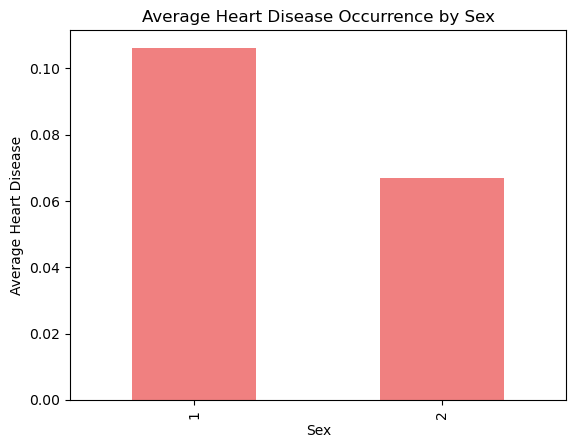

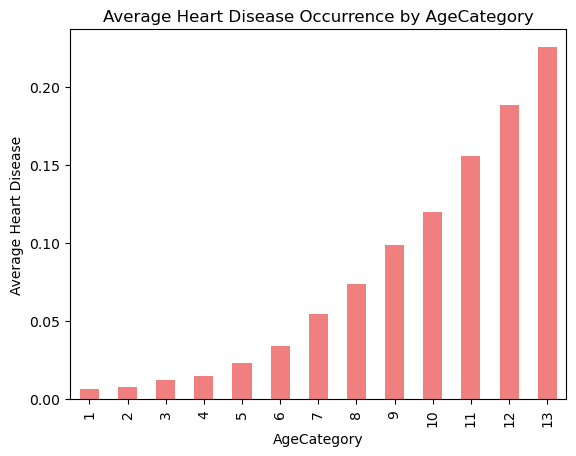

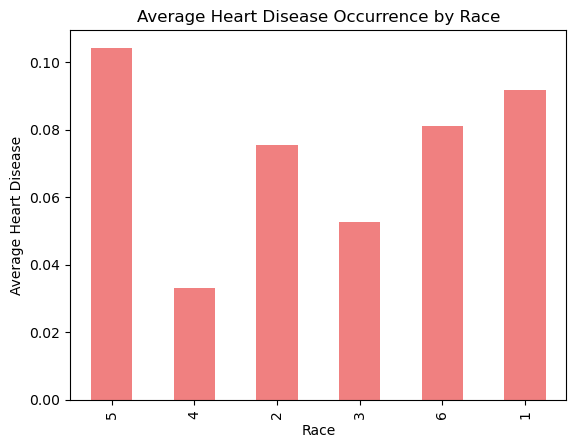

In [55]:
# Analyzing demographic trends in heart disease
demographics = ['Sex', 'AgeCategory', 'Race']

# Understanding heart disease prevalence by demographics
for demo in demographics:
    plt.figure()
    df.groupby(demo)['HeartDisease'].mean().plot(kind='bar', color='lightcoral')
    plt.title(f'Average Heart Disease Occurrence by {demo}')
    plt.xlabel(demo)
    plt.ylabel('Average Heart Disease')
    plt.show()


### Comorbidity and Complications:

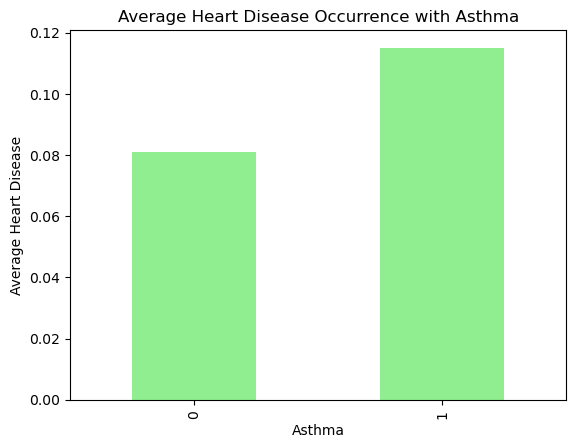

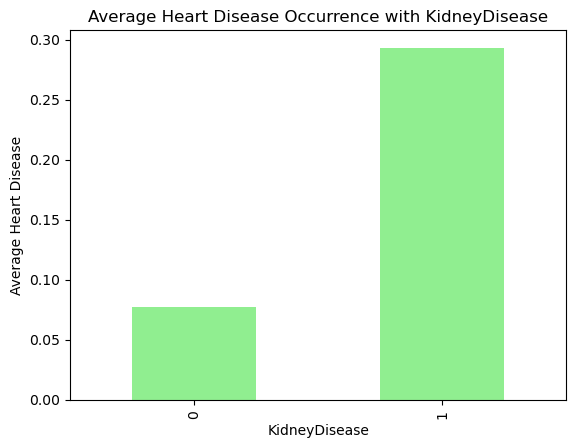

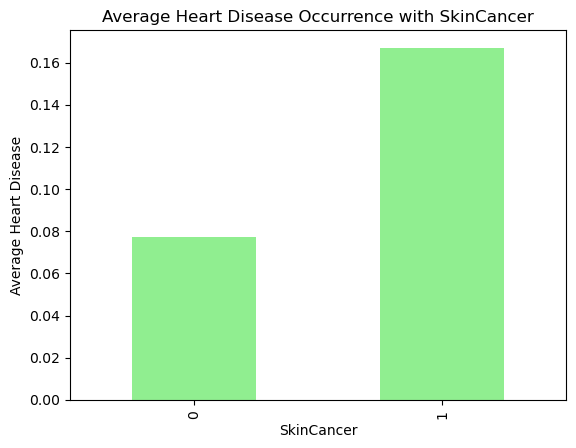

In [56]:
# Exploring comorbidities and complications
comorbidities = ['Asthma', 'KidneyDisease', 'SkinCancer']

# Analyzing associations between comorbidities and heart disease
for comorbidity in comorbidities:
    plt.figure()
    df.groupby(comorbidity)['HeartDisease'].mean().plot(kind='bar', color='lightgreen')
    plt.title(f'Average Heart Disease Occurrence with {comorbidity}')
    plt.xlabel(comorbidity)
    plt.ylabel('Average Heart Disease')
    plt.show()


### Health Management Strategies:

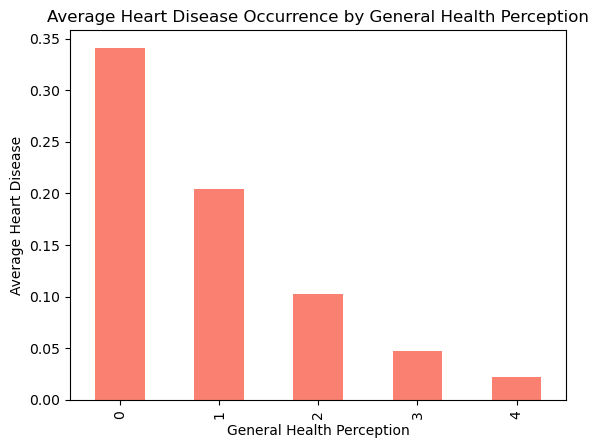

In [57]:
# Understanding overall health perception
plt.figure()
df.groupby('GenHealth')['HeartDisease'].mean().plot(kind='bar', color='salmon')
plt.title('Average Heart Disease Occurrence by General Health Perception')
plt.xlabel('General Health Perception')
plt.ylabel('Average Heart Disease')
plt.show()


# EXTRA